# FIT5196 Assignment 2
Student Name: Michael Pettit

Student ID: 28746511

Mount the drive

In [370]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In this assignment, there are 3 files in which data needs to be cleaned, removed and imputed respectively. There will be  dirty data file, an outlier data file and a missing data file. Each of these files will be explored with the appropriate cleansing performed on each

# Part 1. Looking at the Dirty File

So, firstly we want to look at our dirty file and fix up an analmoies we can find. We know there can only be one ananomly per row with only one fix. Thus, lets open our file and take a quick look to see if we can find any such anomolies

Note: we are told that order_id, time, the numeric quantitiy in order_items and delivery_fee are error-free. 

Hence there are 4 error-free columns and 8 columns we need to check

In [371]:
# Load the dirty file and take a look at the dataset

import pandas as pd

dirty = pd.read_csv('/content/drive/Shareddrives/FIT5196-s2-2022/A2/input_data/28746511_dirty_data.csv')

print(dirty.shape)

dirty.head(10)

(500, 12)


,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDA07117,2021-09-09,16:16:54,Dinner,BK,"[('Fish&Chips', 3), ('Salmon', 10), ('Shrimp',...",1001.00,-37.822204,144.975708,0,7.446,14.696441
1,ORDZ07064,2021-01-19,08:30:25,Breakfast,NS,"[('Cereal', 10), ('Eggs', 9)]",389.00,-37.799833,144.939835,1,8.944,14.147243
2,ORDJ10873,2021-04-16,11:22:49,Breakfast,TP,"[('Eggs', 3), ('Pancake', 3), ('Cereal', 9)]",309.75,-37.824397,144.988546,0,9.196,11.626007
3,ORDB00540,2021-04-17,11:32:57,Breakfast,TP,"[('Coffee', 3), ('Eggs', 7)]",163.50,-37.815964,144.972272,0,8.202,12.283309
4,ORDC02969,2021-10-08,17:17:44,Dinner,NS,"[('Salmon', 5), ('Pasta', 3), ('Fish&Chips', 5)]",462.50,-37.804378,144.993297,0,8.551,14.187069
5,ORDY02742,2021-02-26,09:51:32,Breakfast,TP,"[('Coffee', 2), ('Pancake', 9)]",211.25,-37.818576,144.966991,0,7.576,10.634576
6,ORDA10112,2021-02-12,09:21:07,Breakfast,BK,"[('Cereal', 7), ('Eggs', 9), ('Pancake', 4), (...",473.00,-37.807997,144.968795,0,6.913,11.814639
7,ORDK06856,2021-10-24,17:48:10,Dinner,BK,"[('Salmon', 3), ('Fish&Chips', 3), ('Shrimp', ...",665.00,-37.815824,144.992110,0,5.307,14.561978
8,ORDA00203,2021-03-05,10:01:41,Breakfast,BK,"[('Pancake', 9), ('Eggs', 10), ('Coffee', 1), ...",595.75,-37.803123,144.961601,0,7.862,13.415311
9,ORDI09527,2021-07-25,14:45:38,Lunch,NS,"[('Steak', 1), ('Salad', 4), ('Burger', 1), ('...",252.80,-37.813115,144.951406,0,8.582,15.586482


In [372]:
dirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_id                 500 non-null    object 
 1   date                     500 non-null    object 
 2   time                     500 non-null    object 
 3   order_type               500 non-null    object 
 4   branch_code              500 non-null    object 
 5   order_items              500 non-null    object 
 6   order_price              500 non-null    float64
 7   customer_lat             500 non-null    float64
 8   customer_lon             500 non-null    float64
 9   customerHasloyalty?      500 non-null    int64  
 10  distance_to_customer_KM  500 non-null    float64
 11  delivery_fee             500 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 47.0+ KB


In [373]:
dirty.describe()

,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,469.185700,-35.379083,143.139009,0.062000,8.878164,14.045670
std,269.262196,19.357390,18.204538,0.241397,1.733091,2.518901
min,32.000000,-37.828229,-37.817430,0.000000,3.481000,5.834092
25%,268.875000,-37.818522,144.949846,0.000000,7.848750,12.856113
50%,398.750000,-37.812196,144.964126,0.000000,8.883500,14.180308
75%,640.875000,-37.804926,144.982107,0.000000,9.943250,15.580120
max,1465.500000,145.010615,145.015488,1.000000,13.071000,21.334668


In [374]:
# The distribution of the categorical variables

dirty.describe(include=['O'])

,order_id,date,time,order_type,branch_code,order_items
count,500,500,500,500,500,500
unique,500,266,72,3,5,498
top,ORDA07117,2021-06-10,09:00:50,Breakfast,NS,"[('Fries', 5), ('Steak', 7)]"
freq,1,5,15,176,189,2


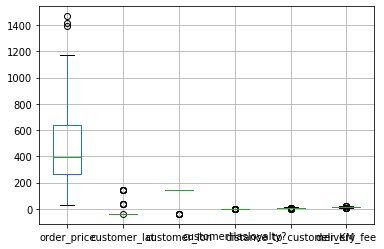

In [375]:
# Boxplot of all the variables

import matplotlib.pyplot as plt
%matplotlib inline

bp = dirty.boxplot()

## 1.1 Branch Code

The first issue we can see is the branch_code, we notice that there a 5 unique codes whereas in the supplementary file branches.csv, there are only 3 codes. Hence there are 2 codes present that should not be there 

In [376]:
# First we can look at all the unique values of branch_code in our dataset

dirty['branch_code'].unique()

array(['BK', 'NS', 'TP', 'tp', 'bk'], dtype=object)

In [377]:
# Here we can look at their individual counts

dirty.branch_code.value_counts()

NS    189
BK    156
TP    152
bk      2
tp      1
Name: branch_code, dtype: int64

We can see that the issue is some of the codes being lowercase. Hence we can replace these with the proper codes

In [378]:
# Replace all the other forms of branch_code that aren't in the supplementary file into the desired format

dirty['branch_code'].replace({'bk':'BK', 'tp':'TP'}, inplace=True)

In [379]:
# Check the counts again

dirty.branch_code.value_counts()

NS    189
BK    158
TP    153
Name: branch_code, dtype: int64

## 1.2 Date

Now that we have fixed the branch code, we can no longer see any issues at the forefront just based on looking at some of the data. Thus, we can start looking at the each of the columns, we can look at columns from left to right and knowing that the order_id is error-free, date is the next column to look at.

We know that date should be in the format of YYYY-MM-DD, thus we can check each of the instances to make sure this is the case and if not, we can change them

In [380]:
# Create a function that validates the date and if the date is not in the right format to print that date

import datetime

def validate(date_text):
      try:
          datetime.datetime.strptime(date_text, '%Y-%m-%d')
      except ValueError:
          print(date_text)

Run some test cases

In [381]:
validate('2003-12-23')

In [382]:
validate('2003-12-32')

2003-12-32


In [383]:
# Apply the validation to each of the dates in the date column

a = list(dirty['date'])

for item in a:
  validate(item)

Thu Jul  8 00:00:00 2021
2021-17-04
2021-31-12
Sun Dec 12 00:00:00 2021
2021-Oct-12
2021-19-12


Now that we have all the dates that are in the wrong format, we can go ahead and change them to the correct format

As we want to ensure these are changed for every scenario, we can use regular expressions to validate the dates or change them when necessary

In [384]:
dirty.loc[dirty['date'] == 'Thu Jul  8 00:00:00 2021']

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
58,ORDZ04342,Thu Jul 8 00:00:00 2021,14:15:12,Lunch,NS,"[('Steak', 8), ('Fries', 3), ('Chicken', 3)]",492.0,-37.813338,144.938684,0,10.238,16.146339


In [385]:
dirty.at[58,'date'] = '2021-07-08'

In [386]:
dirty.loc[dirty['date'] ==  'Sun Dec 12 00:00:00 2021']

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
351,ORDJ05907,Sun Dec 12 00:00:00 2021,19:29:34,Dinner,TP,"[('Pasta', 7), ('Fish&Chips', 2)]",262.5,-37.809486,144.963764,0,8.666,14.265718


In [387]:
dirty.at[351,'date'] = '2021-12-12'

Now we want to change the rest, we can see that we have one month with the Oct, thus we can change this in case any month occurs as a name and not a number. Then we can check if the month is larger than 12, if it is we can switch it with the day 

In [388]:
dirty

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDA07117,2021-09-09,16:16:54,Dinner,BK,"[('Fish&Chips', 3), ('Salmon', 10), ('Shrimp',...",1001.00,-37.822204,144.975708,0,7.446,14.696441
1,ORDZ07064,2021-01-19,08:30:25,Breakfast,NS,"[('Cereal', 10), ('Eggs', 9)]",389.00,-37.799833,144.939835,1,8.944,14.147243
2,ORDJ10873,2021-04-16,11:22:49,Breakfast,TP,"[('Eggs', 3), ('Pancake', 3), ('Cereal', 9)]",309.75,-37.824397,144.988546,0,9.196,11.626007
3,ORDB00540,2021-04-17,11:32:57,Breakfast,TP,"[('Coffee', 3), ('Eggs', 7)]",163.50,-37.815964,144.972272,0,8.202,12.283309
4,ORDC02969,2021-10-08,17:17:44,Dinner,NS,"[('Salmon', 5), ('Pasta', 3), ('Fish&Chips', 5)]",462.50,-37.804378,144.993297,0,8.551,14.187069
...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORDA02834,2021-07-11,14:15:12,Lunch,BK,"[('Burger', 9), ('Chicken', 10), ('Fries', 7),...",820.60,-37.802059,144.957004,0,8.209,16.538886
496,ORDA01721,2021-11-23,18:49:00,Dinner,BK,"[('Shrimp', 5), ('Salmon', 1)]",311.00,-37.821000,144.976720,0,7.254,13.529690
497,ORDX05750,2021-06-04,13:04:13,Lunch,BK,"[('Salad', 7), ('Steak', 7), ('Fries', 9), ('B...",734.40,-37.817088,144.932764,0,10.563,16.105944
498,ORDX10826,2021-07-18,14:35:29,Lunch,BK,"[('Chicken', 8), ('Salad', 4), ('Burger', 10),...",979.80,-37.817893,145.008265,0,4.025,11.981232


In [389]:
# extracting year, month and date columns by pandas Series and spliting the date value
split_date = dirty['date'].apply(lambda s: pd.Series({'year': (s.split('-')[0].strip()),
                            'month': (s.split('-')[1].strip()), 'day': (s.split('-')[2].strip())}))

In [390]:
#concating new columns with original dataframe
dirty = pd.concat([dirty, split_date], axis=1) 
dirty.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,year,month,day
0,ORDA07117,2021-09-09,16:16:54,Dinner,BK,"[('Fish&Chips', 3), ('Salmon', 10), ('Shrimp',...",1001.00,-37.822204,144.975708,0,7.446,14.696441,2021,09,09
1,ORDZ07064,2021-01-19,08:30:25,Breakfast,NS,"[('Cereal', 10), ('Eggs', 9)]",389.00,-37.799833,144.939835,1,8.944,14.147243,2021,01,19
2,ORDJ10873,2021-04-16,11:22:49,Breakfast,TP,"[('Eggs', 3), ('Pancake', 3), ('Cereal', 9)]",309.75,-37.824397,144.988546,0,9.196,11.626007,2021,04,16
3,ORDB00540,2021-04-17,11:32:57,Breakfast,TP,"[('Coffee', 3), ('Eggs', 7)]",163.50,-37.815964,144.972272,0,8.202,12.283309,2021,04,17
4,ORDC02969,2021-10-08,17:17:44,Dinner,NS,"[('Salmon', 5), ('Pasta', 3), ('Fish&Chips', 5)]",462.50,-37.804378,144.993297,0,8.551,14.187069,2021,10,08


In [391]:
def fix_date(date):
    # split the date values by "-"
    year, month, day = date.split('-')
   
    # if the month is not a literal, change to a literal
    if month == 'Jan':
      month = 1
    elif month == 'Feb':
      month = 2
    elif month == 'Mar':
      month = 3
    elif month == 'Apr':
      month = 4
    elif month == 'May':
      month = 5
    elif month == 'Jun':
      month = 6
    elif month == 'Jul':
      month = 7
    elif month == 'Aug':
      month = 8
    elif month == 'Sep':
      month = 9
    elif month == 'Oct':
      month = 10
    elif month == 'Nov':
      month = 11
    elif month == 'Dec':
      month = 12
    
    # if the month is greater than 12, swap it with the day
    elif int(month) > 12:
      day, month = month, day

    
    #formulating correct date format
    date_correct = f'{year}-{month}-{day}'
            
    return date_correct

In [392]:
#apply the function into original dataset
dirty['date'] = dirty['date'].apply(lambda x: fix_date(x))

In [393]:
# Apply the validation again to see if any dates are still wrong

a = list(dirty['date'])

for item in a:
  validate(item)

In [394]:
dirty = dirty.drop(['year', 'month', 'day'], axis = 1)

## 1.3 Order Type

Next we can move on to order_type, order_type is an attribute representing the type of order, namely: Breakfast, Lunch or Dinner. 

We already know from the unique values that there are exactly 3 unique values which was to be expected, so we don't have to remove or replace any incorrect spellings or anything like that. However, we can pair order_type with time, knowing that the time column is error-free, we can check the time and order_type together and see if they match. We know that breakfast is served between 8am-12pm, lunch between 12:00:01pm-4pm and dinner between 4:00:01pm-8pm. Thus, we can check these and change the order_type if it doesn't match what it should be comparable to the time

In [395]:
# Check the order_type counts 

dirty.order_type.value_counts()

Breakfast    176
Dinner       165
Lunch        159
Name: order_type, dtype: int64

In [396]:
import numpy as np

In [397]:
# Create a new column based on the conditions and values

conditions = [
    (dirty['time'] >= '08:00:00') & (dirty['time'] <= '12:00:00'),
    (dirty['time'] >= '12:00:01') & (dirty['time'] <= '16:00:00'),
    (dirty['time'] >= '16:00:01') & (dirty['time'] <= '20:00:00')
]

values = ['Breakfast', 'Lunch', 'Dinner']

dirty['order_type'] = np.select(conditions, values)

In [398]:
dirty.order_type.value_counts()

Breakfast    178
Dinner       165
Lunch        157
Name: order_type, dtype: int64

We can see that 2 order_types that were previously lunch are now breakfast

## 1.4 Longitude and Latitude

Having another look at the longitude and latitude, it looks as though some of the longitudes and latitudes have been swapped around, this we can check the nodes.csv (the supplementary document) and change any rows necessary 


In [399]:
# Get the nodes files from the shared drive
nodes = pd.read_csv("/content/drive/Shareddrives/FIT5196-s2-2022/A2/supplementary_files/nodes.csv")
nodes.head()

,node,lat,lon
0,711327755,-37.807675,144.955873
1,711327756,-37.807094,144.955978
2,711327759,-37.807301,144.957817
3,711327760,-37.807885,144.957719
4,777781264,-37.805221,144.952173


Take a look at the values in the nodes.csv and see if our dataframe values match these

In [400]:
# get the max and min values of latitude and longitude columns using min() and max()
lat_max = nodes['lat'].max()
lat_min = nodes['lat'].min()

lon_max = nodes['lon'].max()
lon_min = nodes['lon'].min()

print('Latititude max:', lat_max)
print('Latititude min:', lat_min)
print('Longitute max:', lon_max)
print('Longitute min:', lon_min)

Latititude max: -37.7396359
Latititude min: -38.1109156
Longitute max: 145.04645
Longitute min: 144.6541725


We can check all the values outside these ranges in our dataset

In [401]:
# check lat
dirty_lat = dirty[(dirty['customer_lat'] > lat_max) | (dirty['customer_lat'] < lat_min)]

# check lon
dirty_lon = dirty[(dirty['customer_lon'] > lon_max) | (dirty['customer_lon'] < lon_min)]

In [402]:
# Show the shape of the incorrect latitudes
print(dirty_lat.shape)
dirty_lat.head(10)

(9, 12)


,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
54,ORDZ00531,2021-04-06,11:02:32,Breakfast,NS,"[('Pancake', 3), ('Cereal', 9), ('Eggs', 9), (...",457.75,144.989877,-37.815324,0,9.125,14.340727
113,ORDK03468,2021-03-01,09:51:32,Breakfast,BK,"[('Pancake', 4), ('Eggs', 9)]",278.00,37.813244,145.015362,0,5.432,9.565580
146,ORDJ02286,2021-09-20,16:37:10,Dinner,TP,"[('Salmon', 7), ('Fish&Chips', 8)]",567.00,37.806476,144.932217,0,11.000,14.588976
240,ORDJ00459,2021-10-23,17:48:10,Dinner,TP,"[('Fish&Chips', 8), ('Shrimp', 8), ('Pasta', 5...",1095.50,145.009942,-37.816164,0,11.747,17.082845
268,ORDZ05019,2021-03-08,10:11:49,Breakfast,NS,"[('Pancake', 2), ('Coffee', 9), ('Eggs', 7), (...",341.00,37.820198,145.000540,0,10.352,15.840609
398,ORDC08087,2021-12-26,19:49:51,Dinner,NS,"[('Shrimp', 1), ('Fish&Chips', 7), ('Salmon', ...",656.00,144.932813,-37.814383,0,9.103,16.993275
429,ORDX04104,2021-02-21,09:41:24,Breakfast,BK,"[('Cereal', 7), ('Coffee', 8)]",184.00,145.010615,-37.799136,0,5.051,12.394329
433,ORDI08314,2021-12-12,19:29:34,Dinner,NS,"[('Pasta', 5), ('Fish&Chips', 10), ('Salmon', 6)]",733.50,37.808289,144.968739,0,6.969,15.055874
440,ORDX11010,2021-11-06,18:08:27,Dinner,BK,"[('Shrimp', 8), ('Fish&Chips', 2), ('Salmon', 2)]",584.00,144.952643,-37.817430,0,8.755,18.007520


In [403]:
# Show the shape of the incorrect longitudes
print(dirty_lon.shape)
dirty_lon.head(10)

(5, 12)


,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
54,ORDZ00531,2021-04-06,11:02:32,Breakfast,NS,"[('Pancake', 3), ('Cereal', 9), ('Eggs', 9), (...",457.75,144.989877,-37.815324,0,9.125,14.340727
240,ORDJ00459,2021-10-23,17:48:10,Dinner,TP,"[('Fish&Chips', 8), ('Shrimp', 8), ('Pasta', 5...",1095.50,145.009942,-37.816164,0,11.747,17.082845
398,ORDC08087,2021-12-26,19:49:51,Dinner,NS,"[('Shrimp', 1), ('Fish&Chips', 7), ('Salmon', ...",656.00,144.932813,-37.814383,0,9.103,16.993275
429,ORDX04104,2021-02-21,09:41:24,Breakfast,BK,"[('Cereal', 7), ('Coffee', 8)]",184.00,145.010615,-37.799136,0,5.051,12.394329
440,ORDX11010,2021-11-06,18:08:27,Dinner,BK,"[('Shrimp', 8), ('Fish&Chips', 2), ('Salmon', 2)]",584.00,144.952643,-37.817430,0,8.755,18.007520


If the latitude is greater than the max and the longitude lower than the min, then swap the values around

In [404]:
def fix_location(lat, lon):
    if (lat > 144.6541725 and lon < -37.7396359):
        # if the condition meets swaping lon, lat values
        lat, lon = lon, lat
        
    # the function return a series datatype 
    location = pd.Series({'customer_lat':lat, 'customer_lon':lon})
    return location

In [405]:
correct_location = dirty.apply(lambda x: fix_location(x['customer_lat'], x['customer_lon']), axis=1)

# change the longitudes and latitudes
dirty['customer_lat'] = correct_location['customer_lat']
dirty['customer_lon'] = correct_location['customer_lon']

In [406]:
dirty['customer_lat'].describe()

count    500.000000
mean     -37.207000
std        6.743662
min      -37.828229
25%      -37.818522
50%      -37.812460
75%      -37.805085
max       37.820198
Name: customer_lat, dtype: float64

In [407]:
dirty['customer_lon'].describe()

count    500.000000
mean     144.966926
std        0.023138
min      144.919800
25%      144.950242
50%      144.964532
75%      144.982626
max      145.015488
Name: customer_lon, dtype: float64

In [408]:
dirty[dirty['customer_lat'] > 0]

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
113,ORDK03468,2021-03-01,09:51:32,Breakfast,BK,"[('Pancake', 4), ('Eggs', 9)]",278.0,37.813244,145.015362,0,5.432,9.565580
146,ORDJ02286,2021-09-20,16:37:10,Dinner,TP,"[('Salmon', 7), ('Fish&Chips', 8)]",567.0,37.806476,144.932217,0,11.000,14.588976
268,ORDZ05019,2021-03-08,10:11:49,Breakfast,NS,"[('Pancake', 2), ('Coffee', 9), ('Eggs', 7), (...",341.0,37.820198,145.000540,0,10.352,15.840609
433,ORDI08314,2021-12-12,19:29:34,Dinner,NS,"[('Pasta', 5), ('Fish&Chips', 10), ('Salmon', 6)]",733.5,37.808289,144.968739,0,6.969,15.055874


## 1.5 Distance_to_cutomer_KM

Next we want to check the distance to customer column, we are given supplementary files which contain the longitude and latitude of each of the branches as well as their corresponding nodes. There are also a node file which also contains relevant longitude and latitude, and finally there is an edges file that can be used to link all these together using a graph 

In [409]:
unfixed = dirty[dirty['customer_lat'] > 0]

In [410]:
# Get the nodes from shared drive
nodes = pd.read_csv("/content/drive/Shareddrives/FIT5196-s2-2022/A2/supplementary_files/nodes.csv")
nodes.head()

,node,lat,lon
0,711327755,-37.807675,144.955873
1,711327756,-37.807094,144.955978
2,711327759,-37.807301,144.957817
3,711327760,-37.807885,144.957719
4,777781264,-37.805221,144.952173


In [411]:
# Get the edges files from the shared drive
edges = pd.read_csv("/content/drive/Shareddrives/FIT5196-s2-2022/A2/supplementary_files/edges.csv")
edges.head()

,Unnamed: 0,u,v,distance(m),street type,speed(km/h)
0,0,711327755,711332946,58.0,1,15.0
1,2,711327755,55725841,15.0,2,20.0
2,3,711327755,711327760,165.0,1,15.0
3,4,711327756,703557073,4.0,0,10.0
4,5,711327756,711332946,8.0,1,15.0


In [412]:
# Get the branches files from the shared drive
branches = pd.read_csv("/content/drive/Shareddrives/FIT5196-s2-2022/A2/supplementary_files/branches.csv")
branches.head()

,branch_code,branch_name,branch_lat,branch_lon
0,NS,Nickolson,-37.773803,144.983647
1,TP,Thompson,-37.861835,144.905716
2,BK,Bakers,-37.815834,145.046450


In [413]:
# Combine branches and nodes 
branches = pd.merge(branches, nodes, how='left'
                       , left_on=['branch_lat','branch_lon'], right_on=['lat','lon'])
print(branches.shape)
branches.head()

(3, 7)


,branch_code,branch_name,branch_lat,branch_lon,node,lat,lon
0,NS,Nickolson,-37.773803,144.983647,2455254505,-37.773803,144.983647
1,TP,Thompson,-37.861835,144.905716,1390575046,-37.861835,144.905716
2,BK,Bakers,-37.815834,145.046450,1889485053,-37.815834,145.046450


In [414]:
# Remove unnecessary files
branches = branches.drop('lat', axis=1)
branches = branches.drop('lon', axis=1)
branches.rename(columns={'node':'branch_node'}, inplace=True)
branches.head()

,branch_code,branch_name,branch_lat,branch_lon,branch_node
0,NS,Nickolson,-37.773803,144.983647,2455254505
1,TP,Thompson,-37.861835,144.905716,1390575046
2,BK,Bakers,-37.815834,145.046450,1889485053


In [415]:
# merge dirty dataset with nodes by latitude and longitude
dirty = pd.merge(dirty, nodes, how='left'
                       , left_on=['customer_lat','customer_lon'], right_on=['lat','lon'])
print(dirty.shape)

(500, 15)


In [416]:
# Remove unnecessary columns
dirty = dirty.drop('lat', axis=1)
dirty = dirty.drop('lon', axis=1)

In [417]:
# create list from nodes df node column
nodes_list=list(nodes.node)
print(len(nodes_list))
print(nodes_list[0:10])

17117
[711327755, 711327756, 711327759, 711327760, 777781264, 711327758, 164102232, 26476632, 26476637, 26476642]


In [418]:
import networkx as nx

In [419]:
G = nx.Graph()
# add nodes list into the graph
G.add_nodes_from(nodes_list)
# check nodes count
G.number_of_nodes()

17117

In [420]:
edges_list = []
for index, row in edges.iterrows():
    edges_list.append((row['u'], row['v'], {'weight':row['distance(m)']}))
print(len(edges_list))
print(edges_list[0:10])

42224
[(711327755.0, 711332946.0, {'weight': 58.0}), (711327755.0, 55725841.0, {'weight': 15.0}), (711327755.0, 711327760.0, {'weight': 165.0}), (711327756.0, 703557073.0, {'weight': 4.0}), (711327756.0, 711332946.0, {'weight': 8.0}), (711327756.0, 711331420.0, {'weight': 44.0}), (711327759.0, 711331451.0, {'weight': 8.0}), (711327759.0, 703557072.0, {'weight': 5.0}), (711327759.0, 711331434.0, {'weight': 32.0}), (711327760.0, 603633283.0, {'weight': 14.0})]


In [421]:
G.add_edges_from(edges_list)
# check number of edges in the graph
G.number_of_edges()

25491

In [422]:
dirty = dirty[dirty['customer_lat'] < 0]

In [423]:
dirty_BK = dirty[dirty['branch_code'] == 'BK']

In [424]:
# Add branch code node 
dirty_BK['BK_branch_node'] = '1889485053'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [425]:
# Get distance to the BK branch

BK_distance_list = []
for index, row in dirty_BK.iterrows():
  BK_distance_list.append((nx.dijkstra_path_length(G,int(row['node']),int(row['BK_branch_node']))))  

BK_distance_list = [item/1000 for item in BK_distance_list]
print(len(BK_distance_list))
BK_distance_list[0:10]

157


[7.446, 6.913, 5.307, 7.862, 7.278, 8.617, 6.01, 4.187, 3.61, 9.137]

In [426]:
# ADd new column to dataframe
dirty_BK = dirty_BK.assign(new_calculated_distance = BK_distance_list)

print(dirty_BK.shape)
dirty_BK.head()

(157, 15)


,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,node,BK_branch_node,new_calculated_distance
0,ORDA07117,2021-09-09,16:16:54,Dinner,BK,"[('Fish&Chips', 3), ('Salmon', 10), ('Shrimp',...",1001.00,-37.822204,144.975708,0,7.446,14.696441,2.700682e+09,1889485053,7.446
6,ORDA10112,2021-02-12,09:21:07,Breakfast,BK,"[('Cereal', 7), ('Eggs', 9), ('Pancake', 4), (...",473.00,-37.807997,144.968795,0,6.913,11.814639,2.518598e+08,1889485053,6.913
7,ORDK06856,2021-10-24,17:48:10,Dinner,BK,"[('Salmon', 3), ('Fish&Chips', 3), ('Shrimp', ...",665.00,-37.815824,144.992110,0,5.307,14.561978,4.315300e+09,1889485053,5.307
8,ORDA00203,2021-03-05,10:01:41,Breakfast,BK,"[('Pancake', 9), ('Eggs', 10), ('Coffee', 1), ...",595.75,-37.803123,144.961601,0,7.862,13.415311,3.127183e+08,1889485053,7.862
12,ORDX04680,2021-09-26,16:47:19,Dinner,BK,"[('Fish&Chips', 3), ('Salmon', 9)]",474.00,-37.804002,144.968017,0,7.278,16.650184,3.189789e+09,1889485053,7.278


In [427]:
# check if the two columns are the same, return 1 if true and 0 otherwise
dirty_BK['Diff'] = np.where(dirty_BK['distance_to_customer_KM'] == dirty_BK['new_calculated_distance'] , '1', '0')
# check how many rows are same
dirty_BK['Diff'].value_counts()

1    152
0      5
Name: Diff, dtype: int64

In [428]:
dirty_BK[dirty_BK['Diff'] == '0']

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,node,BK_branch_node,new_calculated_distance,Diff
63,ORDK02624,2021-06-05,13:04:13,Lunch,BK,"[('Steak', 6), ('Chicken', 5), ('Salad', 5), (...",743.00,-37.813473,144.950174,0,9.870,16.715761,7.100491e+08,1889485053,8.676,0
210,ORDK07094,2021-12-02,19:09:17,Dinner,BK,"[('Pasta', 6), ('Salmon', 5), ('Shrimp', 7)]",748.00,-37.807754,144.961596,0,8.504,14.049261,6.087942e+09,1889485053,7.574,0
354,ORDJ09323,2021-12-27,20:00:00,Dinner,BK,"[('Shrimp', 1), ('Fish&Chips', 9), ('Pasta', 1...",1054.00,-37.815006,144.932818,0,11.107,15.131367,6.197212e+09,1889485053,10.955,0
365,ORDK00179,2021-05-23,12:43:56,Lunch,BK,"[('Steak', 6), ('Fries', 9), ('Chicken', 3), (...",742.60,-37.813532,144.941001,0,10.401,18.158485,6.355297e+08,1889485053,9.606,0
386,ORDJ10645,2021-01-28,08:50:42,Breakfast,BK,"[('Cereal', 8), ('Pancake', 3)]",226.75,-37.810420,145.010473,0,12.408,14.646531,2.070859e+08,1889485053,3.790,0


In [429]:
dirty_NS = dirty[dirty['branch_code'] == 'NS']

In [430]:
# Add branch code node
dirty_NS['NS_branch_node'] = '2455254505'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [431]:
# Get distance to NS branch

NS_distance_list = []
for index, row in dirty_NS.iterrows():
  NS_distance_list.append((nx.dijkstra_path_length(G,int(row['node']),int(row['NS_branch_node']))))  

NS_distance_list = [item/1000 for item in NS_distance_list]
print(len(NS_distance_list))
NS_distance_list[0:10]

187


[8.944, 8.551, 8.582, 7.686, 10.125, 9.794, 9.797, 9.865, 9.554, 8.875]

In [432]:
# Add new column to dataframe
dirty_NS = dirty_NS.assign(new_calculated_distance = NS_distance_list)

print(dirty_NS.shape)
dirty_NS.head()

(187, 15)


,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,node,NS_branch_node,new_calculated_distance
1,ORDZ07064,2021-01-19,08:30:25,Breakfast,NS,"[('Cereal', 10), ('Eggs', 9)]",389.00,-37.799833,144.939835,1,8.944,14.147243,1.371482e+08,2455254505,8.944
4,ORDC02969,2021-10-08,17:17:44,Dinner,NS,"[('Salmon', 5), ('Pasta', 3), ('Fish&Chips', 5)]",462.50,-37.804378,144.993297,0,8.551,14.187069,3.360747e+09,2455254505,8.551
9,ORDI09527,2021-07-25,14:45:38,Lunch,NS,"[('Steak', 1), ('Salad', 4), ('Burger', 1), ('...",252.80,-37.813115,144.951406,0,8.582,15.586482,1.492146e+09,2455254505,8.582
14,ORDZ05897,2021-02-13,09:21:07,Breakfast,NS,"[('Cereal', 6), ('Pancake', 5)]",231.25,-37.813167,144.972865,0,7.686,14.196041,2.550595e+08,2455254505,7.686
18,ORDZ06593,2021-06-03,13:04:13,Lunch,NS,"[('Fries', 3), ('Salad', 5), ('Chicken', 2), (...",459.00,-37.814246,144.935278,0,10.125,15.480441,7.099701e+08,2455254505,10.125


In [433]:
# check if the two columns are the same, return 1 if true or 0 otherwise
dirty_NS['Diff'] = np.where(dirty_NS['distance_to_customer_KM'] == dirty_NS['new_calculated_distance'] , '1', '0')
# check how many rows are same
dirty_NS['Diff'].value_counts()

1    184
0      3
Name: Diff, dtype: int64

In [434]:
# Look at TP branch code
dirty_TP = dirty[dirty['branch_code'] == 'TP']

In [435]:
# Add TP branch code node to dataframe
dirty_TP['TP_branch_node'] = '1390575046' 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [436]:
# Get distance to TP branch

TP_distance_list = []
for index, row in dirty_TP.iterrows():
  TP_distance_list.append((nx.dijkstra_path_length(G,int(row['node']),int(row['TP_branch_node']))))  

TP_distance_list = [item/1000 for item in TP_distance_list]
print(len(TP_distance_list))
TP_distance_list[0:10]

152


[9.196, 8.202, 7.576, 10.688, 8.848, 12.817, 8.675, 8.823, 9.176, 12.196]

In [437]:
# Add new column to dataframe
dirty_TP = dirty_TP.assign(new_calculated_distance = TP_distance_list)

print(dirty_TP.shape)
dirty_TP.head()

(152, 15)


,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,node,TP_branch_node,new_calculated_distance
2,ORDJ10873,2021-04-16,11:22:49,Breakfast,TP,"[('Eggs', 3), ('Pancake', 3), ('Cereal', 9)]",309.75,-37.824397,144.988546,0,9.196,11.626007,576860418.0,1390575046,9.196
3,ORDB00540,2021-04-17,11:32:57,Breakfast,TP,"[('Coffee', 3), ('Eggs', 7)]",163.50,-37.815964,144.972272,0,8.202,12.283309,576877847.0,1390575046,8.202
5,ORDY02742,2021-02-26,09:51:32,Breakfast,TP,"[('Coffee', 2), ('Pancake', 9)]",211.25,-37.818576,144.966991,0,7.576,10.634576,294622370.0,1390575046,7.576
10,ORDY01100,2021-06-28,13:54:55,Lunch,TP,"[('Burger', 9), ('Salad', 1)]",296.20,-37.800663,144.943074,0,10.688,13.287810,781155495.0,1390575046,10.688
11,ORDY04930,2021-04-15,11:22:49,Breakfast,TP,"[('Coffee', 9), ('Cereal', 3), ('Pancake', 4),...",345.50,-37.819788,144.980986,0,8.848,11.517031,576824420.0,1390575046,8.848


In [438]:
# checking if the two columns are the same value, return 1 if true and 0 otherwise
dirty_TP['Diff'] = np.where(dirty_TP['distance_to_customer_KM'] == dirty_TP['new_calculated_distance'] , '1', '0')
# check how many rows are same
dirty_TP['Diff'].value_counts()

1    146
0      6
Name: Diff, dtype: int64

In [439]:
# Combine all separate datasets
dirty = pd.concat([dirty_TP, dirty_BK, dirty_NS], axis=0)

In [440]:
# Drop any unnecessary columns
dirty = dirty.drop(['distance_to_customer_KM', 'node', 'TP_branch_node', 'BK_branch_node', 'NS_branch_node', 'Diff'], axis=1)

In [441]:
# Rename column
dirty.rename(columns={'new_calculated_distance':'distance_to_customer_KM'}, inplace=True)

In [442]:
dirty = pd.concat([dirty, unfixed], axis=0)

In [443]:
dirty = dirty.sort_index(axis=0,ascending=True)

In [444]:
dirty.at[113,'customer_lat'] = -37.813244
dirty.at[146,'customer_lat'] = -37.806476
dirty.at[268,'customer_lat'] = -37.820198
dirty.at[433,'customer_lat'] = -37.808289

## 1.6 Customer Loyalty

Now, we want to check the customerHasloyalty? column, we can do this by predicting theundiscounted delivery fee and and checking if those are firstly correct based on the predictors then applying the discount and seeing if the final delivery price matches up. 

In [445]:
dirty['customerHasloyalty?'].value_counts()

0    469
1     31
Name: customerHasloyalty?, dtype: int64

In [446]:
from datetime import datetime, time

In [447]:
dirty['date'] = dirty['date'].apply(lambda date: pd.Series({'date': datetime.strptime(date, '%Y-%m-%d')}))

In [448]:
# Add day to dataframe
dirty = dirty.assign(day_of_week=dirty.date.dt.weekday)

In [449]:
# create new column based on day_of_week, if it's weekend assign 1 otherwise 0.
dirty['weekend'] = dirty.apply(lambda x: 1 if x['day_of_week'] == 5 
                                                 or x['day_of_week'] == 6 else 0, axis=1)
print(dirty.shape)

(500, 14)


In [450]:
# Add new column based on conditions and values

conditions = [
    (dirty['time'] < '12:00:01'),
    (dirty['time'] >= '12:00:01') & (dirty['time'] < '16:00:01'),
    (dirty['time'] >= '16:00:01') & (dirty['time'] < '20:00:01')
]

values = [0, 1, 2]

dirty['time_of_day'] = np.select(conditions, values)

In [451]:
# Change column name as ? character can cause problems

dirty.rename(columns={'customerHasloyalty?':'customerHasloyalty'}, inplace=True)

In [452]:
# Add new column for undiscounted delivery fee based on the customerHasloyalty condition

conditions = [
    (dirty['customerHasloyalty'] == int(1)),
    (dirty['customerHasloyalty'] != int(1))
    ]

values = [2*(dirty['delivery_fee']), (dirty['delivery_fee'])]
                                        
dirty['undiscounted_delivery_fee'] = np.select(conditions, values)

Run the regresion models built in the missing dataframe

In [453]:
dirty_NS = dirty[dirty['branch_code'] == 'NS']

In [454]:
# Y: delivery fee is target variable
y = dirty_NS['undiscounted_delivery_fee']

# X: 3 independent variables
x = dirty_NS[['time_of_day', 'distance_to_customer_KM', 'weekend']]

# Encode categorical data
x = pd.get_dummies(x)
x


,time_of_day,distance_to_customer_KM,weekend
1,0,8.944,0
4,2,8.551,0
9,1,8.582,1
14,0,7.686,1
18,1,10.125,0
...,...,...,...
486,1,9.805,0
488,2,7.639,1
490,2,11.646,0
491,1,9.563,0


We can use the linear regression model used in the missing data frame to train our current dataframe, we can then find the residual values to veerify if the customerloyalty column is correct 

In [455]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [456]:
def linear_regression_model(x, y, training_target = 0.5, max_iter = 1000):
    #adjusted R2
    r_2 = 0
    iteration = 1
    # using a linear regression model
    linear_reg = linear_model.LinearRegression()
    
    while(r_2 < training_target and iteration < max_iter):
        # splitting train, test dataset 80% and 20%
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2)
        # fitting the linear regression
        linear_reg.fit(x_train, y_train)
        
        # looping the model
        r_2 = linear_reg.score(x_test, y_test)
        iteration += 1
        
    # evaluate the model by Adjusted R2
    print("Training R2 " + str(linear_reg.score(x_train, y_train)))
    print("Testing R2 " + str(linear_reg.score(x_test, y_test)))
    
    return linear_reg

In [457]:
# fit the model prediction
def linear_prediction_model(linear_reg, x):
    predict_variables = pd.get_dummies(x)
    predict_delivery_fee = linear_reg.predict(predict_variables)
    # set 6 decimals for delivery charge same as original data
    predict_delivery_fee = np.around(predict_delivery_fee, decimals = 6)
    
    return predict_delivery_fee

In [458]:
# delivery fee and other variables
linear_reg = linear_regression_model(x, y)
predict_variables = dirty_NS[['time_of_day', 'distance_to_customer_KM', 'weekend']]
# predict new calculated delivery fee
predict_delivery_fee = linear_prediction_model(linear_reg, predict_variables)
# add a new column in the dataframe
dirty_NS['predict_delivery_fee'] = predict_delivery_fee

print(dirty_NS.shape)

Training R2 0.45444344285186067
Testing R2 0.9376762283345242
(189, 17)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Once we get the residual values, if the residuals are significantly large or signicantly small (negative) we can change the assigned customer loyalty value. If the residual is large change the value from 1 to 0 and if the residual's negative is large, change from 0 to 1

In [459]:
# Get residuals based on difference between true and predicted values
dirty_NS['residual'] = dirty_NS.apply(lambda x: (x['undiscounted_delivery_fee']-x['predict_delivery_fee']), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [460]:
dirty_NS.residual.describe()

count    189.000000
mean      -0.032688
std        1.355248
min       -2.080589
25%       -0.443496
50%       -0.174379
75%        0.146415
max       13.813453
Name: residual, dtype: float64

In [461]:
dirty_NS.customerHasloyalty.value_counts()

0    180
1      9
Name: customerHasloyalty, dtype: int64

In [462]:
dirty_NS.loc[dirty_NS['residual'] > 5]

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty,delivery_fee,distance_to_customer_KM,day_of_week,weekend,time_of_day,undiscounted_delivery_fee,predict_delivery_fee,residual
1,ORDZ07064,2021-01-19,08:30:25,Breakfast,NS,"[('Cereal', 10), ('Eggs', 9)]",389.0,-37.799833,144.939835,1,14.147243,8.944,1,0,0,28.294486,14.481033,13.813453
282,ORDC02854,2021-03-17,10:21:58,Breakfast,NS,"[('Coffee', 7), ('Eggs', 8), ('Cereal', 1)]",226.5,-37.798632,144.966580,1,11.497666,6.597,2,0,0,22.995332,12.458810,10.536522


In [463]:
# Change customerHasloyalty based on residual value
dirty_NS.loc[dirty_NS['residual'] > 5, 'customerHasloyalty'] = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [464]:
dirty_NS.loc[dirty_NS['residual'] < -5, 'customerHasloyalty'] = 1

In [465]:
dirty_NS.customerHasloyalty.value_counts()

0    182
1      7
Name: customerHasloyalty, dtype: int64

We can then repeat the same process for the other two branches

In [466]:
dirty_TP = dirty[dirty['branch_code'] == 'TP']

In [467]:
# Y: delivery fee is target variable
y = dirty_TP['undiscounted_delivery_fee']

# X: 3 independent variables
x = dirty_TP[['time_of_day', 'distance_to_customer_KM', 'weekend']]

# Encode categorical data
x = pd.get_dummies(x)
x

,time_of_day,distance_to_customer_KM,weekend
2,0,9.196,0
3,0,8.202,1
5,0,7.576,0
10,1,10.688,0
11,0,8.848,0
...,...,...,...
478,1,11.301,0
484,2,11.775,0
487,2,8.354,0
493,1,8.483,1


In [468]:
# delivery fee and other variables
linear_reg = linear_regression_model(x, y)
predict_variables = dirty_TP[['time_of_day', 'distance_to_customer_KM', 'weekend']]
# predict new calculated delivery fee
predict_delivery_fee = linear_prediction_model(linear_reg, predict_variables)
# add the column to the dataframe
dirty_TP['predict_delivery_fee'] = predict_delivery_fee

print(dirty_TP.shape)

Training R2 0.23800660973148013
Testing R2 0.5633091936731571
(153, 17)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [469]:
# Get residuals based on difference between true and predicted values 
dirty_TP['residual'] = dirty_TP.apply(lambda x: (x['undiscounted_delivery_fee']-x['predict_delivery_fee']), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [470]:
dirty_TP.residual.describe()

count    153.000000
mean      -0.096133
std        2.115219
min       -1.710599
25%       -0.880138
50%       -0.457480
75%        0.098144
max       13.876606
Name: residual, dtype: float64

In [471]:
dirty_TP.customerHasloyalty.value_counts()

0    136
1     17
Name: customerHasloyalty, dtype: int64

In [472]:
dirty_TP.loc[dirty_TP['residual'] > 5]

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty,delivery_fee,distance_to_customer_KM,day_of_week,weekend,time_of_day,undiscounted_delivery_fee,predict_delivery_fee,residual
88,ORDJ02380,2021-12-07,19:19:26,Dinner,TP,"[('Fish&Chips', 9), ('Pasta', 10), ('Shrimp', ...",808.0,-37.812174,144.962199,1,12.428945,8.270,1,0,2,24.857890,13.819727,11.038163
126,ORDB01321,2021-08-19,15:36:20,Lunch,TP,"[('Fries', 3), ('Salad', 7), ('Steak', 2), ('C...",527.4,-37.817601,144.959031,1,11.714488,7.953,3,0,1,23.428976,12.539561,10.889415
317,ORDY06569,2021-08-10,15:16:03,Lunch,TP,"[('Burger', 5), ('Salad', 7), ('Fries', 7)]",359.4,-37.802116,144.966204,1,13.703708,9.633,1,0,1,27.407416,13.530810,13.876606
374,ORDJ00120,2021-09-11,16:16:54,Dinner,TP,"[('Pasta', 2), ('Salmon', 3)]",178.0,-37.822064,144.974007,1,13.845351,8.192,5,1,2,27.690703,15.145826,12.544877


In [473]:
# Change customerhasloyalty based on residual values
dirty_TP.loc[dirty_TP['residual'] > 5, 'customerHasloyalty'] = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [474]:
dirty_TP.customerHasloyalty.value_counts()

0    140
1     13
Name: customerHasloyalty, dtype: int64

Do the same process to the final branch

In [475]:
dirty_BK = dirty[dirty['branch_code'] == 'BK']

In [476]:
# Y: delivery fee is target variable
y = dirty_BK['undiscounted_delivery_fee']

# X: 3 independent variables
x = dirty_BK[['time_of_day', 'distance_to_customer_KM', 'weekend']]

# Encode categorical data
x = pd.get_dummies(x)
x

,time_of_day,distance_to_customer_KM,weekend
0,2,7.446,0
6,0,6.913,0
7,2,5.307,1
8,0,7.862,0
12,2,7.278,1
...,...,...,...
492,1,7.242,0
495,1,8.209,1
496,2,7.254,0
497,1,10.563,0


In [477]:
# delivery fee and other variables
linear_reg = linear_regression_model(x, y)
predict_variables = dirty_BK[['time_of_day', 'distance_to_customer_KM', 'weekend']]
# predict new calculated delivery fee
predict_delivery_fee = linear_prediction_model(linear_reg, predict_variables)
# add the new column to the dataframe
dirty_BK['predict_delivery_fee'] = predict_delivery_fee

print(dirty_BK.shape)

Training R2 0.7483433993535
Testing R2 0.9745863421715171
(158, 17)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [478]:
# Get residuals based on the difference between true and predicted values
dirty_BK['residual'] = dirty_BK.apply(lambda x: (x['undiscounted_delivery_fee']-x['predict_delivery_fee']), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [479]:
dirty_BK.residual.describe()

count    158.000000
mean      -0.031232
std        1.170270
min       -2.680195
25%       -0.413722
50%       -0.148950
75%        0.132431
max       12.343527
Name: residual, dtype: float64

In [480]:
dirty_BK.customerHasloyalty.value_counts()

0    153
1      5
Name: customerHasloyalty, dtype: int64

In [481]:
# Change customerHasloyalty based on resiudal values
dirty_BK.loc[dirty_BK['residual'] > 5, 'customerHasloyalty'] = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [482]:
dirty_BK.customerHasloyalty.value_counts()

0    154
1      4
Name: customerHasloyalty, dtype: int64

In [483]:
# Combine datasets and reindex rows
dirty = pd.concat([dirty_TP, dirty_BK, dirty_NS], axis=0)
dirty = dirty.sort_index(axis=0,ascending=True)

In [484]:
dirty.customerHasloyalty.value_counts()

0    476
1     24
Name: customerHasloyalty, dtype: int64

## 1.7 Order Items & Order Price

For the order items, we are told that the quantity of these items are correct, however we need to check the items themselves. We are also told that only certain items are served at each meal, thus we should be able to match certain meals to certain items

In [485]:
import json

In [486]:
def fix_order_items(order):
    #when order of order list start with these special characterics
    #replace them them "" or []
    order_list = (
        order
        .replace("'", '"')
        .replace('(', '[')
        .replace(')', ']'))
    #json format for prefering dict()
    food_list = json.loads(order_list)
    #change food: quantity into dict()
    food_list = dict(food_list)
    return food_list

In [487]:
def find_price(file_name, restaurant):
    #read dataset
    df = pd.read_csv(file_name)
    df = df[df['order_type'] == restaurant]
    # only need need shoppin card data for applying `fix_order_items` column
    df['order_items'] = df['order_items'].map(fix_order_items)
    
    # create food list with int type
    food_list = pd.DataFrame(
        df['order_items'].tolist(),
        dtype=int)
    
    #for matrix need to fill nan values by 0,
    #not all foods are ordered in every order
    food_list.fillna(0, inplace=True)
    
    #order_prices read by matrix format with numpy array
    price_list = np.array(df['order_price'])

    # np.linalg.lstsq equationfor finding each food price
    equation = np.linalg.lstsq(food_list, price_list, rcond=None)
    #each food and their price zippend and listed
    food_price = list(zip(food_list, equation[0]))

    return food_price  

food_price_dic = {}

#validate the function with missing dataset
for order_type in dirty['order_type'].unique().tolist():
    predict_price = find_price('/content/drive/Shareddrives/FIT5196-s2-2022/A2/input_data/28746511_missing_data.csv', order_type)

    print(order_type)
    print("-----------------------")
    
    print(predict_price)
    print("-----------------------")
    
    for index, item in predict_price:
      food_price_dic[index] = round(item, 2)


Dinner
-----------------------
[('Shrimp', 54.00000000000002), ('Fish&Chips', 35.000000000000014), ('Salmon', 41.00000000000003), ('Pasta', 27.50000000000002)]
-----------------------
Breakfast
-----------------------
[('Cereal', 19.99999999999998), ('Coffee', 5.4999999999999964), ('Pancake', 22.250000000000007), ('Eggs', 20.999999999999993)]
-----------------------
Lunch
-----------------------
[('Chicken', 32.0), ('Steak', 45.00000000000004), ('Burger', 31.00000000000002), ('Salad', 17.200000000000045), ('Fries', 12.000000000000012)]
-----------------------


In [488]:
food_price_dic

{'Shrimp': 54.0,
 'Fish&Chips': 35.0,
 'Salmon': 41.0,
 'Pasta': 27.5,
 'Cereal': 20.0,
 'Coffee': 5.5,
 'Pancake': 22.25,
 'Eggs': 21.0,
 'Chicken': 32.0,
 'Steak': 45.0,
 'Burger': 31.0,
 'Salad': 17.2,
 'Fries': 12.0}

In [489]:
dirty_dinner = dirty[dirty['order_type'] == 'Dinner']

In [490]:
test = (dirty_dinner['order_items'])

In [491]:
mylist = ' '.join(test)

In [492]:
mylist = mylist.replace('[','')
mylist = mylist.replace(']','')
mylist = mylist.replace('(','')
mylist = mylist.replace(')','')
mylist = mylist.replace(',','')
mylist = mylist.split(' ')

In [493]:
mylist = mylist[0::2]

In [494]:
def countOccurrence(a):
  k = {}
  for j in a:
    if j in k:
      k[j] +=1
    else:
      k[j] =1
  return k

print(countOccurrence(mylist))

{"'Fish&Chips'": 123, "'Salmon'": 125, "'Shrimp'": 116, "'Pasta'": 123, "'Fries'": 1, "'Pancake'": 1}


In [495]:
dirty_dinner.loc[dirty_dinner['order_items'].str.contains("Fries")]

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty,delivery_fee,distance_to_customer_KM,day_of_week,weekend,time_of_day,undiscounted_delivery_fee,predict_delivery_fee,residual
230,ORDA00788,2021-12-28,20:00:00,Dinner,BK,"[('Pasta', 5), ('Fries', 4), ('Salmon', 9), ('...",827.5,-37.82325,144.95973,0,15.42561,8.517,1,0,2,15.42561,15.398292,0.027318


In [496]:
dirty.at[230,'order_items']

"[('Pasta', 5), ('Fries', 4), ('Salmon', 9), ('Fish&Chips', 3)]"

In [497]:
(827.5 - 27.5*5 - 9*41 - 3*35)/4

54.0

In [498]:
dirty.at[230,'order_items'] = "[('Pasta', 5), ('Shrimp', 4), ('Salmon', 9), ('Fish&Chips', 3)]"

In [499]:
dirty_dinner.loc[dirty_dinner['order_items'].str.contains("Pancake")]

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty,delivery_fee,distance_to_customer_KM,day_of_week,weekend,time_of_day,undiscounted_delivery_fee,predict_delivery_fee,residual
284,ORDJ10254,2021-12-29,20:00:00,Dinner,TP,"[('Salmon', 9), ('Fish&Chips', 1), ('Shrimp', ...",893.0,-37.808795,144.982587,0,13.824818,9.681,2,0,2,13.824818,14.652259,-0.827441


In [500]:
dirty.at[284,'order_items']

"[('Salmon', 9), ('Fish&Chips', 1), ('Shrimp', 6), ('Pancake', 6)]"

In [501]:
dirty.at[284,'order_items'] = "[('Salmon', 9), ('Fish&Chips', 1), ('Shrimp', 6), ('Pasta', 6)]"

In [502]:
dirty_lunch = dirty[dirty['order_type'] == 'Lunch']

In [503]:
lunch = (dirty_lunch['order_items'])

In [504]:
lunch_list = ' '.join(lunch)

In [505]:
lunch_list = lunch_list.replace('[','')
lunch_list = lunch_list.replace(']','')
lunch_list = lunch_list.replace('(','')
lunch_list = lunch_list.replace(')','')
lunch_list = lunch_list.replace(',','')
lunch_list = lunch_list.split(' ')

In [506]:
lunch_list = lunch_list[0::2]

In [507]:
print(countOccurrence(lunch_list))

{"'Steak'": 109, "'Salad'": 110, "'Burger'": 113, "'Fries'": 109, "'Chicken'": 107, "'Shrimp'": 1, "'Pancake'": 2, "'Fish&Chips'": 1}


In [508]:
dirty_lunch.loc[dirty_lunch['order_items'].str.contains("Pancake")]

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty,delivery_fee,distance_to_customer_KM,day_of_week,weekend,time_of_day,undiscounted_delivery_fee,predict_delivery_fee,residual
263,ORDK05877,2021-06-20,13:34:38,Lunch,BK,"[('Chicken', 6), ('Fries', 2), ('Pancake', 8)]",576.0,-37.806426,144.961039,0,16.473984,7.605,6,1,1,16.473984,16.012490,0.461494
467,ORDJ02136,2021-08-22,15:46:28,Lunch,TP,"[('Pancake', 2), ('Burger', 8), ('Fries', 4)]",330.4,-37.805491,144.973646,0,14.249179,9.517,6,1,1,14.249179,14.834488,-0.585309


In [509]:
(576 - 6*32 - 2*12)/8 

45.0

In [510]:
dirty.at[263,'order_items'] = "[('Chicken', 6), ('Fries', 2), ('Steak', 8)]"

In [511]:
(330.4	- 4*12 - 8*31)/2

17.19999999999999

In [512]:
dirty.at[467,'order_items'] = "[('Salad', 2), ('Burger', 8), ('Fries', 4)]"

In [513]:
dirty_lunch.loc[dirty_lunch['order_items'].str.contains("Shrimp")]

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty,delivery_fee,distance_to_customer_KM,day_of_week,weekend,time_of_day,undiscounted_delivery_fee,predict_delivery_fee,residual
124,ORDA06541,2021-05-18,12:33:48,Lunch,BK,"[('Shrimp', 4), ('Salad', 9)]",202.8,-37.799078,144.985447,0,11.869211,6.447,1,0,1,11.869211,12.474199,-0.604988


In [514]:
(202.8 - 9*17.2)/4 

12.000000000000007

In [515]:
dirty.at[124,'order_items'] = "[('Fries', 4), ('Salad', 9)]"

In [516]:
dirty_lunch.loc[dirty_lunch['order_items'].str.contains("Fish&Chips")]

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty,delivery_fee,distance_to_customer_KM,day_of_week,weekend,time_of_day,undiscounted_delivery_fee,predict_delivery_fee,residual
425,ORDI09055,2021-07-21,14:35:29,Lunch,NS,"[('Fries', 3), ('Burger', 6), ('Chicken', 4), ...",733.8,-37.816173,145.007404,0,16.535984,10.645,2,0,1,16.535984,16.165976,0.370008


In [517]:
dirty.at[425,'order_items']

"[('Fries', 3), ('Burger', 6), ('Chicken', 4), ('Salad', 4), ('Fish&Chips', 7)]"

In [518]:
(733.8	- 3*12 - 6*31 - 4*17.2 - 4*32 )/7 

44.99999999999999

In [519]:
dirty.at[425,'order_items'] = "[('Fries', 3), ('Burger', 6), ('Chicken', 4), ('Salad', 4), ('Steak', 7)]"

In [520]:
dirty_breakfast = dirty[dirty['order_type'] == 'Breakfast']

In [521]:
breakfast = (dirty_breakfast['order_items'])

In [522]:
break_list = ' '.join(breakfast)

In [523]:
break_list = break_list.replace('[','')
break_list = break_list.replace(']','')
break_list = break_list.replace('(','')
break_list = break_list.replace(')','')
break_list = break_list.replace(',','')
break_list = break_list.split(' ')

In [524]:
break_list = break_list[0::2]

In [525]:
print(countOccurrence(break_list))

{"'Cereal'": 128, "'Eggs'": 132, "'Pancake'": 135, "'Coffee'": 139, "'Fish&Chips'": 1}


In [526]:
dirty_breakfast.loc[dirty_breakfast['order_items'].str.contains("Fish&Chips")]

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty,delivery_fee,distance_to_customer_KM,day_of_week,weekend,time_of_day,undiscounted_delivery_fee,predict_delivery_fee,residual
117,ORDI08604,2021-02-05,09:10:59,Breakfast,NS,"[('Fish&Chips', 9), ('Pancake', 5), ('Eggs', 3)]",223.75,-37.815162,144.971453,0,13.013555,7.816,4,0,0,13.013555,13.509125,-0.49557


In [527]:
dirty.at[117,'order_items'] = "[('Coffee', 9), ('Pancake', 5), ('Eggs', 3)]"

From these 3 lists we can see that there are slight inconsistencies with the data, we know that meals can only be serves at one time of the day, thus, we need to find out which meals need replacing

In [528]:
# converting shopping_cart values to list type for order_items column
dirty['order_items'] = [eval(order) for order in dirty['order_items']]
dirty.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty,delivery_fee,distance_to_customer_KM,day_of_week,weekend,time_of_day,undiscounted_delivery_fee,predict_delivery_fee,residual
0,ORDA07117,2021-09-09,16:16:54,Dinner,BK,"[(Fish&Chips, 3), (Salmon, 10), (Shrimp, 9)]",1001.00,-37.822204,144.975708,0,14.696441,7.446,3,0,2,14.696441,14.338156,0.358285
1,ORDZ07064,2021-01-19,08:30:25,Breakfast,NS,"[(Cereal, 10), (Eggs, 9)]",389.00,-37.799833,144.939835,0,14.147243,8.944,1,0,0,28.294486,14.481033,13.813453
2,ORDJ10873,2021-04-16,11:22:49,Breakfast,TP,"[(Eggs, 3), (Pancake, 3), (Cereal, 9)]",309.75,-37.824397,144.988546,0,11.626007,9.196,4,0,0,11.626007,12.179841,-0.553834
3,ORDB00540,2021-04-17,11:32:57,Breakfast,TP,"[(Coffee, 3), (Eggs, 7)]",163.50,-37.815964,144.972272,0,12.283309,8.202,5,1,0,12.283309,12.965473,-0.682164
4,ORDC02969,2021-10-08,17:17:44,Dinner,NS,"[(Salmon, 5), (Pasta, 3), (Fish&Chips, 5)]",462.50,-37.804378,144.993297,0,14.187069,8.551,4,0,2,14.187069,14.581069,-0.394000


In [529]:
calculated_price = []
# nested for loop for finding the list of calculated prices based on the order
for index, row in dirty.iterrows():
    new_price = 0
    for i in range(len(row.order_items)):
        new_price += row.order_items[i][1]*food_price_dic[row.order_items[i][0]]
    calculated_price.append(round(new_price, 2))

print(len(calculated_price))
print(calculated_price[0:5])

500
[1001.0, 389.0, 309.75, 163.5, 462.5]


In [530]:
dirty = dirty.assign(calculated_price = calculated_price)

print(dirty.shape)
dirty.head()

(500, 19)


,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty,delivery_fee,distance_to_customer_KM,day_of_week,weekend,time_of_day,undiscounted_delivery_fee,predict_delivery_fee,residual,calculated_price
0,ORDA07117,2021-09-09,16:16:54,Dinner,BK,"[(Fish&Chips, 3), (Salmon, 10), (Shrimp, 9)]",1001.00,-37.822204,144.975708,0,14.696441,7.446,3,0,2,14.696441,14.338156,0.358285,1001.00
1,ORDZ07064,2021-01-19,08:30:25,Breakfast,NS,"[(Cereal, 10), (Eggs, 9)]",389.00,-37.799833,144.939835,0,14.147243,8.944,1,0,0,28.294486,14.481033,13.813453,389.00
2,ORDJ10873,2021-04-16,11:22:49,Breakfast,TP,"[(Eggs, 3), (Pancake, 3), (Cereal, 9)]",309.75,-37.824397,144.988546,0,11.626007,9.196,4,0,0,11.626007,12.179841,-0.553834,309.75
3,ORDB00540,2021-04-17,11:32:57,Breakfast,TP,"[(Coffee, 3), (Eggs, 7)]",163.50,-37.815964,144.972272,0,12.283309,8.202,5,1,0,12.283309,12.965473,-0.682164,163.50
4,ORDC02969,2021-10-08,17:17:44,Dinner,NS,"[(Salmon, 5), (Pasta, 3), (Fish&Chips, 5)]",462.50,-37.804378,144.993297,0,14.187069,8.551,4,0,2,14.187069,14.581069,-0.394000,462.50


In [531]:
# check if the two columns are the same
dirty['Diff'] = np.where(dirty['order_price']==dirty['calculated_price'] , '1', '0')
dirty['Diff'].value_counts()

1    493
0      7
Name: Diff, dtype: int64

In [532]:
order_diff = dirty[dirty['Diff'] == '0']

In [533]:
order_diff

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty,delivery_fee,distance_to_customer_KM,day_of_week,weekend,time_of_day,undiscounted_delivery_fee,predict_delivery_fee,residual,calculated_price,Diff
39,ORDX07828,2021-10-30,17:58:18,Dinner,BK,"[(Salmon, 9), (Pasta, 3)]",893.00,-37.808732,144.947367,0,18.501714,9.041,5,1,2,18.501714,18.309014,0.192700,451.50,0
103,ORDI08862,2021-02-03,09:00:50,Breakfast,NS,"[(Pancake, 5), (Coffee, 7)]",72.00,-37.822532,144.963989,0,14.611816,9.112,2,0,0,14.611816,14.625785,-0.013969,149.75,0
185,ORDX06923,2021-05-08,12:13:31,Lunch,BK,"[(Steak, 1), (Chicken, 7), (Burger, 9), (Salad...",202.00,-37.823231,144.955812,0,17.199488,8.782,5,1,1,17.199488,17.177551,0.021937,630.40,0
196,ORDY06946,2021-09-28,16:57:27,Dinner,TP,"[(Shrimp, 2), (Fish&Chips, 6), (Salmon, 5), (P...",546.00,-37.802503,144.967428,0,14.081886,9.666,1,0,2,14.081886,14.643408,-0.561522,743.00,0
255,ORDY07444,2021-02-18,09:31:16,Breakfast,TP,"[(Pancake, 1), (Coffee, 3), (Eggs, 10)]",474.00,-37.822323,144.933451,0,12.568826,10.139,3,0,0,12.568826,12.736238,-0.167412,248.75,0
343,ORDZ09532,2021-10-08,17:17:44,Dinner,NS,"[(Salmon, 3), (Shrimp, 10), (Pasta, 8)]",368.25,-37.807236,144.959469,0,13.508915,7.666,4,0,2,13.508915,13.818535,-0.309620,883.00,0
375,ORDC07415,2021-06-10,13:14:21,Lunch,NS,"[(Salad, 8), (Fries, 1), (Burger, 1)]",788.50,-37.819407,145.014630,0,17.294700,11.474,3,0,1,17.294700,16.880259,0.414441,180.60,0


We can see that there are 7 columns which have incorrect calculated order prices against the original order price

In [534]:
dirty['order_price'] = dirty['calculated_price']

In [535]:
dirty = dirty.drop(['calculated_price', 'Diff', 'day_of_week', 'weekend', 'time_of_day', 'undiscounted_delivery_fee', 'predict_delivery_fee', 'residual'], axis = 1)

In [536]:
dirty

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty,delivery_fee,distance_to_customer_KM
0,ORDA07117,2021-09-09,16:16:54,Dinner,BK,"[(Fish&Chips, 3), (Salmon, 10), (Shrimp, 9)]",1001.00,-37.822204,144.975708,0,14.696441,7.446
1,ORDZ07064,2021-01-19,08:30:25,Breakfast,NS,"[(Cereal, 10), (Eggs, 9)]",389.00,-37.799833,144.939835,0,14.147243,8.944
2,ORDJ10873,2021-04-16,11:22:49,Breakfast,TP,"[(Eggs, 3), (Pancake, 3), (Cereal, 9)]",309.75,-37.824397,144.988546,0,11.626007,9.196
3,ORDB00540,2021-04-17,11:32:57,Breakfast,TP,"[(Coffee, 3), (Eggs, 7)]",163.50,-37.815964,144.972272,0,12.283309,8.202
4,ORDC02969,2021-10-08,17:17:44,Dinner,NS,"[(Salmon, 5), (Pasta, 3), (Fish&Chips, 5)]",462.50,-37.804378,144.993297,0,14.187069,8.551
...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORDA02834,2021-07-11,14:15:12,Lunch,BK,"[(Burger, 9), (Chicken, 10), (Fries, 7), (Sala...",820.60,-37.802059,144.957004,0,16.538886,8.209
496,ORDA01721,2021-11-23,18:49:00,Dinner,BK,"[(Shrimp, 5), (Salmon, 1)]",311.00,-37.821000,144.976720,0,13.529690,7.254
497,ORDX05750,2021-06-04,13:04:13,Lunch,BK,"[(Salad, 7), (Steak, 7), (Fries, 9), (Burger, ...",734.40,-37.817088,144.932764,0,16.105944,10.563
498,ORDX10826,2021-07-18,14:35:29,Lunch,BK,"[(Chicken, 8), (Salad, 4), (Burger, 10), (Frie...",979.80,-37.817893,145.008265,0,11.981232,4.025


### 2. Save Output File

In [537]:
# use to_csv() method
dirty.to_csv("28746511_dirty_data_solution.csv", index = False)

# Part 2. Looking at the Missing File

With the missing file, we are looking to impute the missing values, we can assume that the rest of the file is correct and error-free and the only errors are the missing values

In [538]:
# Load the missing file and take a look at the dataset

missing = pd.read_csv('/content/drive/Shareddrives/FIT5196-s2-2022/A2/input_data/28746511_missing_data.csv')

print(missing.shape)

missing.head(10)

(500, 12)


,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDC05007,2021-05-03,12:03:22,Lunch,NS,"[('Chicken', 6), ('Steak', 6), ('Burger', 7), ...",833.80,-37.812154,144.973932,0,7.626,NaN
1,ORDK04281,2021-04-18,11:32:57,Breakfast,BK,"[('Cereal', 4), ('Coffee', 3), ('Pancake', 3)]",163.25,-37.820035,144.980254,0,7.132,15.042097
2,ORDX05801,2021-09-12,16:27:02,Dinner,BK,"[('Shrimp', 5), ('Fish&Chips', 10), ('Salmon',...",839.00,-37.817093,144.988818,0,5.771,14.724766
3,ORDI04007,2021-05-30,12:54:05,Lunch,NS,"[('Fries', 1), ('Burger', 3), ('Steak', 8), ('...",482.20,-37.804481,144.936400,0,9.784,17.016719
4,ORDJ08853,2021-10-24,17:48:10,Dinner,TP,"[('Pasta', 9), ('Shrimp', 6), ('Salmon', 6), (...",1062.50,-37.817328,144.990782,0,9.849,15.615511
5,ORDX09853,2021-05-17,12:23:39,Lunch,BK,"[('Steak', 10), ('Chicken', 7), ('Salad', 10)]",846.00,-37.803654,144.955463,0,8.202,14.403394
6,ORDX06581,2021-01-09,08:10:08,Breakfast,BK,"[('Cereal', 9), ('Coffee', 6)]",213.00,-37.821138,144.983117,1,6.614,7.013474
7,ORDI05972,2021-11-07,18:18:35,Dinner,NS,"[('Fish&Chips', 9), ('Shrimp', 6), ('Salmon', ...",1132.00,-37.818750,144.953250,0,9.226,16.435626
8,ORDX00523,2021-05-30,12:54:05,Lunch,BK,"[('Salad', 5), ('Burger', 10), ('Chicken', 9),...",1035.00,-37.804982,144.936597,0,9.896,18.462907
9,ORDA01921,2021-08-24,15:46:28,Lunch,BK,"[('Fries', 6), ('Burger', 8), ('Salad', 9)]",474.80,-37.811180,145.007099,0,3.502,9.302501


In [539]:
missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_id                 500 non-null    object 
 1   date                     500 non-null    object 
 2   time                     500 non-null    object 
 3   order_type               500 non-null    object 
 4   branch_code              450 non-null    object 
 5   order_items              500 non-null    object 
 6   order_price              500 non-null    float64
 7   customer_lat             500 non-null    float64
 8   customer_lon             500 non-null    float64
 9   customerHasloyalty?      500 non-null    int64  
 10  distance_to_customer_KM  500 non-null    float64
 11  delivery_fee             400 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 47.0+ KB


Based on the info, we can see that there are 50 missing branch_code items and 100 missing delivery_fee items

In [540]:
missing.describe()

,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
count,500.000000,500.000000,500.000000,500.000000,500.000000,400.000000
mean,492.173900,-37.812449,144.965446,0.056000,8.824692,13.946289
std,273.873716,0.007919,0.021711,0.230152,1.585780,2.627943
min,32.000000,-37.832570,144.909436,0.000000,3.502000,5.398197
25%,277.875000,-37.818881,144.949330,0.000000,7.928000,12.593657
50%,444.500000,-37.812703,144.963600,0.000000,8.998500,14.025192
75%,689.100000,-37.805501,144.982227,0.000000,9.864250,15.452151
max,1344.000000,-37.788265,145.016014,1.000000,15.186000,21.813512


In [541]:
missing.describe(include=['O'])

,order_id,date,time,order_type,branch_code,order_items
count,500,500,500,500,450,500
unique,500,273,72,3,3,498
top,ORDC05007,2021-05-17,12:23:39,Lunch,BK,"[('Pasta', 9), ('Fish&Chips', 7)]"
freq,1,7,13,172,163,2


In [542]:
missing.isnull().sum()

order_id                     0
date                         0
time                         0
order_type                   0
branch_code                 50
order_items                  0
order_price                  0
customer_lat                 0
customer_lon                 0
customerHasloyalty?          0
distance_to_customer_KM      0
delivery_fee               100
dtype: int64

The isnull() function reiterates what we saw with the info, that there 50 missing branch_code items and 100 missing deliery_fee items that need to be imputed

### 2.1 Branch Code

The first column we can look at is Branch Code, we know that there are 3 possible codes and we know that the distance_to_customer_KM column is the shortest distance from the branch to the customer, thus we can use this column along with the customers longitude and latitude to find out the branch_code

In [543]:
# Get nodes from shared file
nodes = pd.read_csv("/content/drive/Shareddrives/FIT5196-s2-2022/A2/supplementary_files/nodes.csv")
nodes.head()

,node,lat,lon
0,711327755,-37.807675,144.955873
1,711327756,-37.807094,144.955978
2,711327759,-37.807301,144.957817
3,711327760,-37.807885,144.957719
4,777781264,-37.805221,144.952173


In [544]:
# Get the branches files from the shared drive
branches = pd.read_csv("/content/drive/Shareddrives/FIT5196-s2-2022/A2/supplementary_files/branches.csv")
branches.head()

,branch_code,branch_name,branch_lat,branch_lon
0,NS,Nickolson,-37.773803,144.983647
1,TP,Thompson,-37.861835,144.905716
2,BK,Bakers,-37.815834,145.046450


In [545]:
# Merge branches and nodes
branches = pd.merge(branches, nodes, how='left'
                       , left_on=['branch_lat','branch_lon'], right_on=['lat','lon'])
print(branches.shape)
branches.head()

(3, 7)


,branch_code,branch_name,branch_lat,branch_lon,node,lat,lon
0,NS,Nickolson,-37.773803,144.983647,2455254505,-37.773803,144.983647
1,TP,Thompson,-37.861835,144.905716,1390575046,-37.861835,144.905716
2,BK,Bakers,-37.815834,145.046450,1889485053,-37.815834,145.046450


In [546]:
# Drop unnecessary columns
branches = branches.drop('lat', axis=1)
branches = branches.drop('lon', axis=1)
branches.rename(columns={'node':'branch_node'}, inplace=True)
branches.head()

,branch_code,branch_name,branch_lat,branch_lon,branch_node
0,NS,Nickolson,-37.773803,144.983647,2455254505
1,TP,Thompson,-37.861835,144.905716,1390575046
2,BK,Bakers,-37.815834,145.046450,1889485053


In [547]:
# Get edges from shared file
edges = pd.read_csv("/content/drive/Shareddrives/FIT5196-s2-2022/A2/supplementary_files/edges.csv")
edges.head()

,Unnamed: 0,u,v,distance(m),street type,speed(km/h)
0,0,711327755,711332946,58.0,1,15.0
1,2,711327755,55725841,15.0,2,20.0
2,3,711327755,711327760,165.0,1,15.0
3,4,711327756,703557073,4.0,0,10.0
4,5,711327756,711332946,8.0,1,15.0


In [548]:
# merge missing_distance dataset with nodes by latitude and longitude columns
missing = pd.merge(missing, nodes, how='left'
                       , left_on=['customer_lat','customer_lon'], right_on=['lat','lon'])

print(missing.shape)

(500, 15)


In [549]:
# Drop redundant columns
missing = missing.drop('lat', axis=1)
missing = missing.drop('lon', axis=1)

In [550]:
# Add branch nodes to dataframe
missing['NS_branch_node'] = '2455254505' 
missing['BK_branch_node'] = '1889485053' 
missing['TP_branch_node'] = '1390575046' 

In [551]:
# Create a list from nodes df node column
nodes_list=list(nodes.node)
print(len(nodes_list))
print(nodes_list[0:10])

17117
[711327755, 711327756, 711327759, 711327760, 777781264, 711327758, 164102232, 26476632, 26476637, 26476642]


In [552]:
G = nx.Graph()
# Add nodes list into the graph
G.add_nodes_from(nodes_list)
# Check the nodes count
G.number_of_nodes()

17117

In [553]:
edges_list = []
for index, row in edges.iterrows():
    edges_list.append((row['u'], row['v'], {'weight':row['distance(m)']}))
print(len(edges_list))
print(edges_list[0:10])

42224
[(711327755.0, 711332946.0, {'weight': 58.0}), (711327755.0, 55725841.0, {'weight': 15.0}), (711327755.0, 711327760.0, {'weight': 165.0}), (711327756.0, 703557073.0, {'weight': 4.0}), (711327756.0, 711332946.0, {'weight': 8.0}), (711327756.0, 711331420.0, {'weight': 44.0}), (711327759.0, 711331451.0, {'weight': 8.0}), (711327759.0, 703557072.0, {'weight': 5.0}), (711327759.0, 711331434.0, {'weight': 32.0}), (711327760.0, 603633283.0, {'weight': 14.0})]


In [554]:
G.add_edges_from(edges_list)
# check number of edges of the graph
G.number_of_edges()

25491

In [555]:
# Find the distances for the NS branch

NS_distance_list = []
for index, row in missing.iterrows():
    NS_distance_list.append((nx.dijkstra_path_length(G,int(row['node']),int(row['NS_branch_node']))))  

print(len(NS_distance_list))
NS_distance_list[0:10]

500


[7626.0,
 9589.0,
 9113.0,
 9784.0,
 9367.0,
 7789.0,
 9231.0,
 9226.0,
 9719.0,
 10063.0]

In [556]:
# Convert the distances to km from metres
NS_distance_list = [item/1000 for item in NS_distance_list]

In [557]:
# Create a new distance column
missing['NS_distance'] = NS_distance_list 

In [558]:
# Get the distances for the BK branch

BK_distance_list = []
for index, row in missing.iterrows():
    BK_distance_list.append((nx.dijkstra_path_length(G,int(row['node']),int(row['BK_branch_node']))))  

BK_distance_list = [item/1000 for item in BK_distance_list]
print(len(BK_distance_list))
BK_distance_list[0:10]

500


[6.77, 7.132, 5.771, 9.961, 5.579, 8.202, 6.614, 8.813, 9.896, 3.502]

In [559]:
# Add the distances to the dataframe
missing['BK_distance'] = BK_distance_list 

In [560]:
# Get the TP distances
TP_distance_list = []
for index, row in missing.iterrows():
    TP_distance_list.append((nx.dijkstra_path_length(G,int(row['node']),int(row['TP_branch_node']))))  

TP_distance_list = [item/1000 for item in TP_distance_list]
print(len(TP_distance_list))
TP_distance_list[0:10]

500


[8.785, 8.79, 9.606, 10.83, 9.849, 9.511, 9.086, 8.528, 10.765, 11.649]

In [561]:
# Add to the dataframe
missing['TP_distance'] = TP_distance_list 

In [562]:
missing.branch_code.value_counts()

BK    163
TP    149
NS    138
Name: branch_code, dtype: int64

Now apply the appropraiate branch code to the row where the branch code is missing according to the correct distance from customer

In [563]:
missing['branch_code'] = np.where((missing.distance_to_customer_KM == missing.NS_distance),'NS', missing.branch_code)

In [564]:
missing['branch_code'] = np.where((missing.distance_to_customer_KM == missing.TP_distance),'TP', missing.branch_code)

In [565]:
missing['branch_code'] = np.where((missing.distance_to_customer_KM == missing.BK_distance),'BK', missing.branch_code)

In [566]:
missing.branch_code.value_counts()

BK    179
TP    166
NS    155
Name: branch_code, dtype: int64

In [567]:
# Drop unnecessary columns
missing = missing.drop(['node', 'NS_branch_node', 'BK_branch_node', 'TP_branch_node', 'NS_distance', 'BK_distance', 'TP_distance'], axis=1)

### 2.2 Delivery Fee

Delivery fee is calculated using a different method for each branch. The fee depends linearly on:
- weekend or weekday (1 or 0)
- time of day (morning 0, afternoon 1, evening 2)
- distance between branch and customer

Also note, if a customer has loyalty, they get a 50% discount on the delivery fee

We also know that each branch has a different method in how they calculate delivery fee

Thus, to impute our missing values, we first need to train our data on the values that are currently there, we also need to add a weekend column as there currently isn't one

In [568]:
missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_id                 500 non-null    object 
 1   date                     500 non-null    object 
 2   time                     500 non-null    object 
 3   order_type               500 non-null    object 
 4   branch_code              500 non-null    object 
 5   order_items              500 non-null    object 
 6   order_price              500 non-null    float64
 7   customer_lat             500 non-null    float64
 8   customer_lon             500 non-null    float64
 9   customerHasloyalty?      500 non-null    int64  
 10  distance_to_customer_KM  500 non-null    float64
 11  delivery_fee             400 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 50.8+ KB


Thus, since we need to know whether the day is a weekday or weekend, we need to add a new column indicating this. Hence, we can extrapolate the day of the week from the date and apply an indicator function to show if that day is a weekend or not

In [569]:
from datetime import datetime, time

In [570]:
# Convert date to datetime
missing['date'] = missing['date'].apply(lambda date: pd.Series({'date': datetime.strptime(date, '%Y-%m-%d')}))

In [571]:
missing = missing.assign(day_of_week=missing.date.dt.weekday)

In [572]:
# Create a new column based on day_of_week, if it's weekend assign 1 otherwise 0.
missing['weekend'] = missing.apply(lambda x: 1 if x['day_of_week'] == 5 
                                                 or x['day_of_week'] == 6 else 0, axis=1)
print(missing.shape)
missing.head()

(500, 14)


,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,day_of_week,weekend
0,ORDC05007,2021-05-03,12:03:22,Lunch,NS,"[('Chicken', 6), ('Steak', 6), ('Burger', 7), ...",833.80,-37.812154,144.973932,0,7.626,NaN,0,0
1,ORDK04281,2021-04-18,11:32:57,Breakfast,BK,"[('Cereal', 4), ('Coffee', 3), ('Pancake', 3)]",163.25,-37.820035,144.980254,0,7.132,15.042097,6,1
2,ORDX05801,2021-09-12,16:27:02,Dinner,BK,"[('Shrimp', 5), ('Fish&Chips', 10), ('Salmon',...",839.00,-37.817093,144.988818,0,5.771,14.724766,6,1
3,ORDI04007,2021-05-30,12:54:05,Lunch,NS,"[('Fries', 1), ('Burger', 3), ('Steak', 8), ('...",482.20,-37.804481,144.936400,0,9.784,17.016719,6,1
4,ORDJ08853,2021-10-24,17:48:10,Dinner,TP,"[('Pasta', 9), ('Shrimp', 6), ('Salmon', 6), (...",1062.50,-37.817328,144.990782,0,9.849,15.615511,6,1


In [573]:
missing['day_of_week'].value_counts()

5    81
4    76
0    75
6    73
3    68
1    67
2    60
Name: day_of_week, dtype: int64

In [574]:
missing['weekend'].value_counts()

0    346
1    154
Name: weekend, dtype: int64

Now we want to get the time of day, mapping morning to 0, afternoon to 1 and evening to 2

In [575]:
# Create a new column based on the conditions to get the time of day

conditions = [
    (missing['time'] < '12:00:01'),
    (missing['time'] >= '12:00:01') & (missing['time'] < '16:00:01'),
    (missing['time'] >= '16:00:01') & (missing['time'] < '20:00:01')
]

values = [0, 1, 2]

missing['time_of_day'] = np.select(conditions, values)

In [576]:
missing.time_of_day.value_counts()

1    172
0    169
2    159
Name: time_of_day, dtype: int64

In [577]:
# change the column as there are issue with the ? character
missing.rename(columns={'customerHasloyalty?':'customerHasloyalty'}, inplace=True)

We also want to apply our regression model on the undiscounted delivery fee and apply the customer discount after the fact, thus we can double the delivery fee of anyone who currently has a customer loyalty applied to their delivery fee

In [578]:
# Add a new column for the undiscounted delivery fee which is the delivery*2 if the customer has a loyalty otherwise it stays the same

conditions = [
    (missing['customerHasloyalty'] == int(1)),
    (missing['customerHasloyalty'] != int(1))
    ]

values = [2*(missing['delivery_fee']), (missing['delivery_fee'])]
                                        
missing['undiscounted_delivery_fee'] = np.select(conditions, values)

In [579]:
missing_delivery_fee = missing.copy()

Now we want to split our data based on the branch code and apply our regression models to each of them

#### 2.2.1 NS Branch

In [580]:
missing_NS = missing_delivery_fee[missing_delivery_fee['branch_code'] == 'NS']

In [581]:
# remove all the null values
missing_train_NS = missing_NS[missing_NS['delivery_fee'].notnull()]

# Y: delivery fee is target variable
y = missing_train_NS['undiscounted_delivery_fee']

#X: 3 independent variables
x = missing_train_NS[['time_of_day', 'distance_to_customer_KM', 'weekend']]

# Encode the categorical data
x = pd.get_dummies(x)
x

,time_of_day,distance_to_customer_KM,weekend
3,1,9.784,1
7,2,9.226,1
11,2,7.414,0
15,0,10.454,0
17,1,9.184,0
...,...,...,...
482,1,10.124,0
483,0,9.378,0
485,2,8.694,0
497,1,9.491,0


In [582]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split

Train the regression model

In [583]:
# the function takes the independent and dependent variables
# max_iter is optional threshold, lets just set it to 1000
def linear_regression_model(x, y, training_target = 0.5, max_iter = 1000):
    #adjusted R2
    r_2 = 0
    iteration = 1
    # using a linear regression model
    linear_reg = linear_model.LinearRegression()
    
    while(r_2 < training_target and iteration < max_iter):
        # splitting train, test dataset 80% and 20%
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2)
        # fit the linear regression
        linear_reg.fit(x_train, y_train)
        
        # loop the model
        r_2 = linear_reg.score(x_test, y_test)
        iteration += 1
        
    # evaluate the model by Adjusted R2
    print("Training R2 " + str(linear_reg.score(x_train, y_train)))
    print("Testing R2 " + str(linear_reg.score(x_test, y_test)))
    
    return linear_reg

In [584]:
# Make the prediction based on the model
def linear_prediction_model(linear_reg, x):
    predict_variables = pd.get_dummies(x)
    predict_delivery_fee = linear_reg.predict(predict_variables)
    # set 6 decimals for delivery charge same as original data
    predict_delivery_fee = np.around(predict_delivery_fee, decimals = 6)
    
    return predict_delivery_fee

In [585]:
# delivery fee and the other variables
linear_reg = linear_regression_model(x, y)
predict_variables = missing_NS[['time_of_day', 'distance_to_customer_KM', 'weekend']]
# predict new calculated delivery fee
predict_delivery_fee = linear_prediction_model(linear_reg, predict_variables)
# add a new column to the dataframe
missing_NS['predict_delivery_fee'] = predict_delivery_fee

print(missing_NS.shape)
missing_NS.head()

Training R2 0.9606249799809499
Testing R2 0.973640402843532
(155, 17)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty,distance_to_customer_KM,delivery_fee,day_of_week,weekend,time_of_day,undiscounted_delivery_fee,predict_delivery_fee
0,ORDC05007,2021-05-03,12:03:22,Lunch,NS,"[('Chicken', 6), ('Steak', 6), ('Burger', 7), ...",833.8,-37.812154,144.973932,0,7.626,NaN,0,0,1,NaN,13.200692
3,ORDI04007,2021-05-30,12:54:05,Lunch,NS,"[('Fries', 1), ('Burger', 3), ('Steak', 8), ('...",482.2,-37.804481,144.936400,0,9.784,17.016719,6,1,1,17.016719,17.334452
7,ORDI05972,2021-11-07,18:18:35,Dinner,NS,"[('Fish&Chips', 9), ('Shrimp', 6), ('Salmon', ...",1132.0,-37.818750,144.953250,0,9.226,16.435626,6,1,2,16.435626,17.248393
10,ORDI02891,2021-12-02,19:09:17,Dinner,NS,"[('Fish&Chips', 7), ('Shrimp', 3), ('Salmon', ...",859.5,-37.815461,144.940522,0,9.694,NaN,3,0,2,NaN,15.646578
11,ORDI06541,2021-12-10,19:19:26,Dinner,NS,"[('Shrimp', 8), ('Salmon', 5)]",637.0,-37.809675,144.964029,0,7.414,13.519730,4,0,2,13.519730,13.448240


Impute the missing delivery fees

In [586]:
missing_NS['undiscounted_delivery_fee'].fillna(value = missing_NS['predict_delivery_fee'], inplace=True)

print(missing_NS.shape)

(155, 17)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Do the same thing for the other two branches

#### 2.2.2 TP Branch

In [587]:
missing_TP = missing_delivery_fee[missing_delivery_fee['branch_code'] == 'TP']

In [588]:
# Make a dataframe without the null values
missing_train_TP = missing_TP[missing_TP['delivery_fee'].notnull()]

# Y: delivery fee is target variable
y = missing_train_TP['undiscounted_delivery_fee']

#X: 3 independent variables
x = missing_train_TP[['time_of_day', 'distance_to_customer_KM', 'weekend']]

# Encode categorical data
x = pd.get_dummies(x)
x

,time_of_day,distance_to_customer_KM,weekend
4,2,9.849,1
12,1,8.495,0
13,0,10.131,1
16,0,10.243,0
23,2,8.496,0
...,...,...,...
472,2,9.720,1
484,2,10.044,0
489,0,11.346,1
491,2,9.401,0


In [589]:
# delivery fee and the other variables
linear_reg = linear_regression_model(x, y)
predict_variables = missing_TP[['time_of_day', 'distance_to_customer_KM', 'weekend']]
# predict new calculated delivery fee
predict_delivery_fee = linear_prediction_model(linear_reg, predict_variables)
# add the column to the dataframe
missing_TP['predict_delivery_fee'] = predict_delivery_fee

print(missing_TP.shape)
missing_TP.head()

Training R2 0.9502179416683608
Testing R2 0.8979551269112271
(166, 17)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty,distance_to_customer_KM,delivery_fee,day_of_week,weekend,time_of_day,undiscounted_delivery_fee,predict_delivery_fee
4,ORDJ08853,2021-10-24,17:48:10,Dinner,TP,"[('Pasta', 9), ('Shrimp', 6), ('Salmon', 6), (...",1062.50,-37.817328,144.990782,0,9.849,15.615511,6,1,2,15.615511,15.447045
12,ORDY08807,2021-05-14,12:23:39,Lunch,TP,"[('Salad', 5), ('Chicken', 8), ('Fries', 7), (...",457.00,-37.813190,144.966306,0,8.495,12.195645,4,0,1,12.195645,11.904937
13,ORDJ08202,2021-01-02,08:00:00,Breakfast,TP,"[('Coffee', 5), ('Cereal', 6), ('Pancake', 7),...",387.25,-37.800566,144.976512,1,10.131,6.947563,5,1,0,13.895125,14.160116
16,ORDY02361,2021-04-09,11:12:40,Breakfast,TP,"[('Coffee', 10), ('Cereal', 9), ('Pancake', 2)]",279.50,-37.810778,144.939145,0,10.243,12.175499,4,0,0,12.175499,12.644185
22,ORDJ05040,2021-05-17,12:23:39,Lunch,TP,"[('Burger', 4), ('Salad', 2)]",158.40,-37.815799,144.963695,0,7.925,NaN,0,0,1,NaN,11.414492


In [590]:
missing_TP['undiscounted_delivery_fee'].fillna(value = missing_TP['predict_delivery_fee'], inplace=True)

print(missing_TP.shape)

(166, 17)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


#### 2.2.3 BK Branch Code

In [591]:
missing_BK = missing_delivery_fee[missing_delivery_fee['branch_code'] == 'BK']

In [592]:
# Make a dataframe without the null values
missing_train_BK = missing_BK[missing_BK['delivery_fee'].notnull()]

# Y: delivery fee is the target variable
y = missing_train_BK['undiscounted_delivery_fee']

# X: 3 independent variables
x = missing_train_BK[['time_of_day', 'distance_to_customer_KM', 'weekend']]

# Encode categorical data
x = pd.get_dummies(x)
x

,time_of_day,distance_to_customer_KM,weekend
1,0,7.132,1
2,2,5.771,1
5,1,8.202,0
6,0,6.614,1
8,1,9.896,1
...,...,...,...
488,1,9.670,0
490,1,7.563,1
492,0,6.481,0
494,0,9.014,0


In [593]:
# delivery fee and the other variables
linear_reg = linear_regression_model(x, y)
predict_variables = missing_BK[['time_of_day', 'distance_to_customer_KM', 'weekend']]
# predict new calculated delivery fee
predict_delivery_fee = linear_prediction_model(linear_reg, predict_variables)
# add the column to the dataframe
missing_BK['predict_delivery_fee'] = predict_delivery_fee

print(missing_BK.shape)
missing_BK.head()

Training R2 0.9785029830702051
Testing R2 0.9842416799297341
(179, 17)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty,distance_to_customer_KM,delivery_fee,day_of_week,weekend,time_of_day,undiscounted_delivery_fee,predict_delivery_fee
1,ORDK04281,2021-04-18,11:32:57,Breakfast,BK,"[('Cereal', 4), ('Coffee', 3), ('Pancake', 3)]",163.25,-37.820035,144.980254,0,7.132,15.042097,6,1,0,15.042097,14.657225
2,ORDX05801,2021-09-12,16:27:02,Dinner,BK,"[('Shrimp', 5), ('Fish&Chips', 10), ('Salmon',...",839.00,-37.817093,144.988818,0,5.771,14.724766,6,1,2,14.724766,15.072356
5,ORDX09853,2021-05-17,12:23:39,Lunch,BK,"[('Steak', 10), ('Chicken', 7), ('Salad', 10)]",846.00,-37.803654,144.955463,0,8.202,14.403394,0,0,1,14.403394,14.138002
6,ORDX06581,2021-01-09,08:10:08,Breakfast,BK,"[('Cereal', 9), ('Coffee', 6)]",213.00,-37.821138,144.983117,1,6.614,7.013474,5,1,0,14.026948,14.113946
8,ORDX00523,2021-05-30,12:54:05,Lunch,BK,"[('Salad', 5), ('Burger', 10), ('Chicken', 9),...",1035.00,-37.804982,144.936597,0,9.896,18.462907,6,1,1,18.462907,18.477386


In [594]:
# replace NA values with the predicted values
missing_BK['undiscounted_delivery_fee'].fillna(value = missing_BK['predict_delivery_fee'], inplace=True)

print(missing_BK.shape)

(179, 17)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


#### 2.2.4 Combine dataframes and apply loyalty

Now that we have imputed all our undiscounted delivery fee, we can join these dataframes back together

In [595]:
# Combine dataframes and reindex rows
final = pd.concat([missing_TP, missing_BK, missing_NS], axis=0)
final = final.sort_index(axis=0,ascending=True)

Now apply the discount if the customer has loyalty

In [596]:
# Apply the condition to get the final delivery fee

conditions = [
    (final['customerHasloyalty'] == int(1)),
    (final['customerHasloyalty'] != int(1))
    ]

values = [(final['undiscounted_delivery_fee']/2), (final['undiscounted_delivery_fee'])]
                                        
final['new_delivery_fee'] = np.select(conditions, values)

In [597]:
# Drop unnecessary columns
final = final.drop(['delivery_fee', 'day_of_week', 'weekend', 'undiscounted_delivery_fee', 'predict_delivery_fee', 'time_of_day'], axis=1)

In [598]:
final.rename(columns={'new_delivery_fee':'delivery_fee'}, inplace=True)

### 2.3 Save the Missing Data Solution File

Save the output file to csv

In [599]:
# use to_csv() method
final.to_csv("28746511_missing_data_solution.csv", index = False)

# Part 3. Looking at the Outlier File

In the outlier file, we are looking to detect outliers and remove all the outlier rows in the dataset. Once again we are assuming each of the rows are now error-free and the only issue in the dataset are outliers

In [600]:
# Load the outlier file and take a look at the dataset

outlier = pd.read_csv('/content/drive/Shareddrives/FIT5196-s2-2022/A2/input_data/28746511_outlier_data.csv')

print(outlier.shape)

outlier.head(10)

(500, 12)


,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDZ03316,2021-01-21,08:40:33,Breakfast,NS,"[('Pancake', 2), ('Eggs', 8)]",212.50,-37.799752,145.009384,0,10.020,14.717922
1,ORDY01629,2021-05-23,12:43:56,Lunch,TP,"[('Steak', 2), ('Burger', 1), ('Salad', 8), ('...",366.60,-37.815340,144.940552,0,10.083,14.446898
2,ORDX09323,2021-12-14,19:29:34,Dinner,BK,"[('Salmon', 7), ('Fish&Chips', 10)]",637.00,-37.814701,144.969144,0,7.277,13.769445
3,ORDI04623,2021-06-19,13:34:38,Lunch,NS,"[('Burger', 7), ('Salad', 7), ('Fries', 7)]",421.40,-37.806452,144.959563,0,7.642,14.825338
4,ORDC04856,2021-09-07,16:16:54,Dinner,NS,"[('Pasta', 6), ('Fish&Chips', 6), ('Shrimp', 4)]",591.00,-37.825537,144.976460,0,9.429,15.939789
5,ORDY01768,2021-01-05,08:00:00,Breakfast,TP,"[('Pancake', 2), ('Cereal', 5), ('Coffee', 2)]",155.50,-37.806842,144.954220,1,9.258,6.256160
6,ORDX09409,2021-06-20,13:34:38,Lunch,BK,"[('Salad', 1), ('Chicken', 9), ('Fries', 3), (...",791.20,-37.804184,144.958548,0,7.914,16.590822
7,ORDZ08502,2021-06-03,13:04:13,Lunch,NS,"[('Steak', 4), ('Chicken', 1)]",212.00,-37.814317,144.935907,0,10.067,15.891486
8,ORDB10961,2021-11-09,18:18:35,Dinner,TP,"[('Pasta', 7), ('Fish&Chips', 10), ('Salmon', ...",719.50,-37.803972,144.950015,0,9.989,13.682100
9,ORDX09723,2021-04-04,11:02:32,Breakfast,BK,"[('Coffee', 8), ('Pancake', 1), ('Cereal', 3),...",168.25,-37.823320,144.935196,0,10.644,18.058146


In [601]:
outlier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_id                 500 non-null    object 
 1   date                     500 non-null    object 
 2   time                     500 non-null    object 
 3   order_type               500 non-null    object 
 4   branch_code              500 non-null    object 
 5   order_items              500 non-null    object 
 6   order_price              500 non-null    float64
 7   customer_lat             500 non-null    float64
 8   customer_lon             500 non-null    float64
 9   customerHasloyalty?      500 non-null    int64  
 10  distance_to_customer_KM  500 non-null    float64
 11  delivery_fee             500 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 47.0+ KB


In [602]:
outlier.describe()

,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,466.067700,-37.812617,144.966994,0.046000,8.758828,13.878765
std,256.845853,0.007597,0.020553,0.209695,1.573661,3.166443
min,43.000000,-37.835050,144.925964,0.000000,3.698000,3.489699
25%,275.562500,-37.818804,144.952887,0.000000,7.834000,12.501062
50%,414.300000,-37.812542,144.963896,0.000000,8.804000,13.975781
75%,639.500000,-37.806669,144.980923,0.000000,9.802000,15.439272
max,1397.000000,-37.792631,145.015418,1.000000,12.793000,27.634265


In [603]:
outlier.describe(include=['O'])

,order_id,date,time,order_type,branch_code,order_items
count,500,500,500,500,500,500
unique,500,279,72,3,3,497
top,ORDZ03316,2021-12-07,11:43:05,Breakfast,TP,"[('Fish&Chips', 3), ('Salmon', 5)]"
freq,1,6,13,178,175,2


### 3.1 EDA

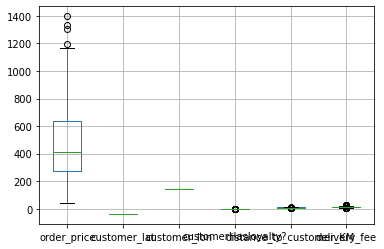

In [604]:
# Lets take a look at all our variables using boxplots 

import matplotlib.pyplot as plt
%matplotlib inline

bp = outlier.boxplot()

We can see that there are only outliers in the order_price, distance_to_customer_KM and delivery_fee variables. So we can have a look at each of these boxplots individually before taking any other steps

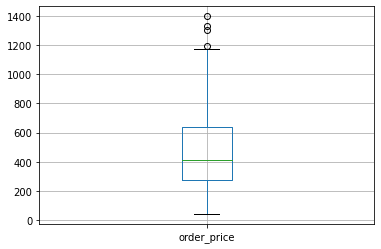

In [605]:
# Boxplot for price

bp = outlier.boxplot(column = 'order_price')

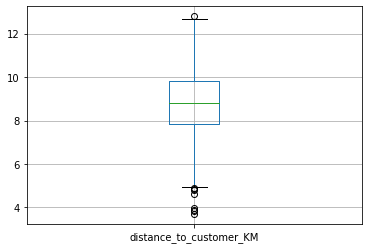

In [606]:
# Boxplot for distance_to_customer_KM

bp = outlier.boxplot(column = 'distance_to_customer_KM')

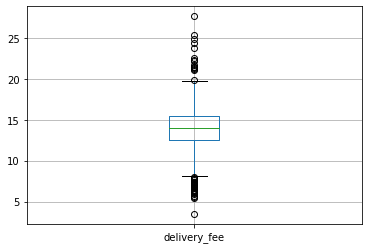

In [607]:
# Boxplot for delivery_fee

bp = outlier.boxplot(column = 'delivery_fee')

We can see that delivery fee looks to contain the most amount of outliers, so we can attempt to amend this issue and see if it reduces the outliers from the other two variables

Thus, we can now take a deeper dive into the delivery_fee variable

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


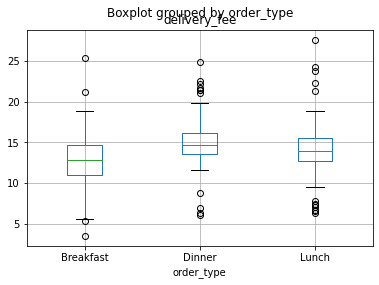

In [608]:
# Determining delivery_fee by the order_type

bp2 = outlier.boxplot(column = 'delivery_fee', by = 'order_type')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


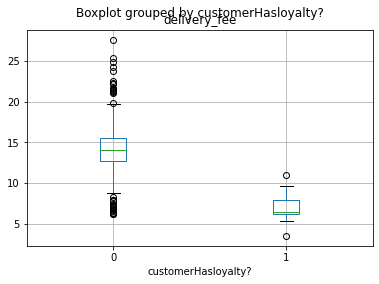

In [609]:
# Determining delivery_fee by customerHasloyalty? 

bp2 = outlier.boxplot(column = 'delivery_fee', by = 'customerHasloyalty?')

Now that we have had a look at some of the outliers, we can now go about removing them. We can join the previous dataset to this one, re-train the model to get a predicted delivery_fee, look at the residuals and apply the 1.5 IQR rule to remove the outliers from our outlier dataset

### 3.2 Combine Datasets and Data Preparation

We want to prepare the data for the regression model we are going to  apply on it

We want to add a weekend column to the dataset

In [610]:
# Rename column as the ? character can cause issues
outlier.rename(columns={'customerHasloyalty?':'customerHasloyalty'}, inplace=True)

In [611]:
# Change the date datatype to datetime
outlier['date'] = outlier['date'].apply(lambda date: pd.Series({'date': datetime.strptime(date, '%Y-%m-%d')}))

Combine the outlier dataset with the missing dataset, so we can run the regression model on even more data as to train the model better

In [612]:
# Combine the missing dataframe with the outlier one
outlier2 = pd.concat([outlier, final], axis=0)

In [613]:
# Reset the index
outlier2 = outlier2.reset_index(drop=True)

In [614]:
# Add the day of the week based on the date
outlier2 = outlier2.assign(day_of_week=outlier2.date.dt.weekday)

In [615]:
# Add the weekend column 
outlier2['weekend'] = outlier2.apply(lambda x: 1 if x['day_of_week'] == 5 
                                                 or x['day_of_week'] == 6 else 0, axis=1)

Now we can add the time of day, which is also needed for the regression model

In [616]:
# Add the time of day based on the conditions

conditions = [
    (outlier2['time'] < '12:00:01'),
    (outlier2['time'] >= '12:00:01') & (outlier2['time'] < '16:00:01'),
    (outlier2['time'] >= '16:00:01') & (outlier2['time'] < '20:00:01')
]

values = [0, 1, 2]

outlier2['time_of_day'] = np.select(conditions, values)

We want to apply our regression model on the undiscounted delivery fee, so we can multiply the delivery fee by 2 if the customer is apart of the loyalty program

In [617]:
# Add the undiscounted delivery fee based on the customerHasloyalty column

conditions = [
    (outlier2['customerHasloyalty'] == int(1)),
    (outlier2['customerHasloyalty'] != int(1))
    ]

values = [2*(outlier2['delivery_fee']), (outlier2['delivery_fee'])]
                                        
outlier2['undiscounted_delivery_fee'] = np.select(conditions, values)

### 3.3 Run Linear Regression on Combined Dataset for each branch

As each branch has a different way to calculate the delivery fee, we can do each branch individually, remove the outliers from each of the individual branch datasets, then combine the overall results

We can do similar regression models as we have done recently in the other datasets and use the same functions to build, train and make predicitons

In [618]:
outlier_TP = outlier2[outlier2['branch_code'] == 'TP']

In [619]:
# Y: delivery fee is the target variable
y = outlier_TP['undiscounted_delivery_fee']

#X: 3 independent variables
x = outlier_TP[['time_of_day', 'distance_to_customer_KM', 'weekend']]

# Encode categorical data
x = pd.get_dummies(x)
x

,time_of_day,distance_to_customer_KM,weekend
1,1,10.083,1
5,0,9.258,0
8,2,9.989,0
15,0,11.396,0
20,1,9.857,1
...,...,...,...
984,2,10.044,0
989,0,11.346,1
991,2,9.401,0
995,2,11.578,1


In [620]:
def linear_regression_model(x, y, training_target = 0.5, max_iter = 1000):
    #adjusted R2
    r_2 = 0
    iteration = 1
    # using a linear regression model
    linear_reg = linear_model.LinearRegression()
    
    while(r_2 < training_target and iteration < max_iter):
        # splitting train, test dataset 80% and 20%
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2)
        # fit the linear regression model
        linear_reg.fit(x_train, y_train)
        
        # loop the model
        r_2 = linear_reg.score(x_test, y_test)
        iteration += 1
        
    # evaluate the model by Adjusted R2
    print("Training R2 " + str(linear_reg.score(x_train, y_train)))
    print("Testing R2 " + str(linear_reg.score(x_test, y_test)))
    
    return linear_reg


In [621]:
def linear_prediction_model(linear_reg, x):
    predict_variables = pd.get_dummies(x)
    predict_delivery_fee = linear_reg.predict(predict_variables)
    # set 6 decimals for delivery charge same as original data
    predict_delivery_fee = np.around(predict_delivery_fee, decimals = 6)
    
    return predict_delivery_fee

In [622]:
# delivery fee and the other variables
linear_reg = linear_regression_model(x, y)
predict_variables = outlier_TP[['time_of_day', 'distance_to_customer_KM', 'weekend']]
# predict new calculated delivery fee
predict_delivery_fee = linear_prediction_model(linear_reg, predict_variables)
# add the column to the dataframe
outlier_TP['predicted_delivery_fee'] = predict_delivery_fee

print(outlier_TP.shape)

Training R2 0.45787116351047574
Testing R2 0.9725506792407025
(341, 17)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


We can see that our results aren't that great for the TP branch in the combined dataset, lets look at another branch 

In [623]:
outlier_BK = outlier2[outlier2['branch_code'] == 'BK']

In [624]:
# Y: delivery fee is target variable
y = outlier_BK['undiscounted_delivery_fee']

# X: 3 independent variables
x = outlier_BK[['time_of_day', 'distance_to_customer_KM', 'weekend']]

# Encode categorical data
x = pd.get_dummies(x)
x

,time_of_day,distance_to_customer_KM,weekend
2,2,7.277,0
6,1,7.914,1
9,0,10.644,1
11,1,4.946,1
12,1,7.215,0
...,...,...,...
990,1,7.563,1
992,0,6.481,0
993,2,10.384,1
994,0,9.014,0


In [625]:
# delivery fee and the other variables
linear_reg = linear_regression_model(x, y)
predict_variables = outlier_BK[['time_of_day', 'distance_to_customer_KM', 'weekend']]
# predict new calculated delivery fee
predict_delivery_fee = linear_prediction_model(linear_reg, predict_variables)
# add the column to the dataframe
outlier_BK['predicted_delivery_fee'] = predict_delivery_fee

print(outlier_BK.shape)
outlier_BK.head()

Training R2 0.741799030167251
Testing R2 0.7209655106284747
(341, 17)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty,distance_to_customer_KM,delivery_fee,day_of_week,weekend,time_of_day,undiscounted_delivery_fee,predicted_delivery_fee
2,ORDX09323,2021-12-14,19:29:34,Dinner,BK,"[('Salmon', 7), ('Fish&Chips', 10)]",637.00,-37.814701,144.969144,0,7.277,13.769445,1,0,2,13.769445,14.275873
6,ORDX09409,2021-06-20,13:34:38,Lunch,BK,"[('Salad', 1), ('Chicken', 9), ('Fries', 3), (...",791.20,-37.804184,144.958548,0,7.914,16.590822,6,1,1,16.590822,16.447622
9,ORDX09723,2021-04-04,11:02:32,Breakfast,BK,"[('Coffee', 8), ('Pancake', 1), ('Cereal', 3),...",168.25,-37.823320,144.935196,0,10.644,18.058146,6,1,0,18.058146,18.125336
11,ORDA07081,2021-06-27,13:44:47,Lunch,BK,"[('Steak', 3), ('Salad', 10)]",307.00,-37.815846,145.015418,0,4.946,13.285429,6,1,1,13.285429,13.430234
12,ORDA06535,2021-08-09,15:16:03,Lunch,BK,"[('Fries', 2), ('Burger', 7), ('Salad', 9)]",395.80,-37.805046,144.967249,0,7.215,13.275110,0,0,1,13.275110,13.115128


The results for the second branch continue to look average, now onto the last branch 

In [626]:
outlier_NS = outlier2[outlier2['branch_code'] == 'NS']

In [627]:
# Y: delivery fee is target variable
y = outlier_NS['undiscounted_delivery_fee']

# X: 3 independent variables
x = outlier_NS[['time_of_day', 'distance_to_customer_KM', 'weekend']]

# Encode categorical data
x = pd.get_dummies(x)
x

,time_of_day,distance_to_customer_KM,weekend
0,0,10.020,0
3,1,7.642,1
4,2,9.429,0
7,1,10.067,0
10,2,8.008,0
...,...,...,...
982,1,10.124,0
983,0,9.378,0
985,2,8.694,0
997,1,9.491,0


In [628]:
# delivery fee and the other variables
linear_reg = linear_regression_model(x, y)
predict_variables = outlier_NS[['time_of_day', 'distance_to_customer_KM', 'weekend']]
# predict new calculated delivery fee
predict_delivery_fee = linear_prediction_model(linear_reg, predict_variables)
# add the column to the dataframe
outlier_NS['predicted_delivery_fee'] = predict_delivery_fee

print(outlier_NS.shape)
outlier_NS.head()

Training R2 0.4898851460832764
Testing R2 0.6473779257524256
(318, 17)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty,distance_to_customer_KM,delivery_fee,day_of_week,weekend,time_of_day,undiscounted_delivery_fee,predicted_delivery_fee
0,ORDZ03316,2021-01-21,08:40:33,Breakfast,NS,"[('Pancake', 2), ('Eggs', 8)]",212.5,-37.799752,145.009384,0,10.020,14.717922,3,0,0,14.717922,15.018940
3,ORDI04623,2021-06-19,13:34:38,Lunch,NS,"[('Burger', 7), ('Salad', 7), ('Fries', 7)]",421.4,-37.806452,144.959563,0,7.642,14.825338,5,1,1,14.825338,15.366780
4,ORDC04856,2021-09-07,16:16:54,Dinner,NS,"[('Pasta', 6), ('Fish&Chips', 6), ('Shrimp', 4)]",591.0,-37.825537,144.976460,0,9.429,15.939789,1,0,2,15.939789,15.569503
7,ORDZ08502,2021-06-03,13:04:13,Lunch,NS,"[('Steak', 4), ('Chicken', 1)]",212.0,-37.814317,144.935907,0,10.067,15.891486,3,0,1,15.891486,15.632737
10,ORDI06391,2021-10-04,17:07:36,Dinner,NS,"[('Fish&Chips', 4), ('Shrimp', 3), ('Salmon', 1)]",343.0,-37.804258,144.954309,0,8.008,14.116387,0,0,2,14.116387,14.165036


We can see that all 3 predict the undiscounted deleivery fee not that well, so we can remove the outliers from each set indiviudally and see if the models are improved

### 3.4 Remove Outliers

We can once again use the residuals, we can calculate the residuals by looking at the difference between the true value and the predicted value. We can then apply the 1.5IQR on the residuals, if a residual is outside the specified range then we can remove it from the dataset

#### 3.4.1 TP Branch

In [629]:
# Get the residuals based on the difference between true and predicted values
outlier_TP['residual'] = outlier_TP.apply(lambda x: (x['undiscounted_delivery_fee']-x['predicted_delivery_fee']), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


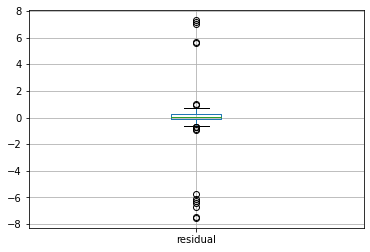

In [630]:
# Boxplot for the residuals
outlier_TP.boxplot(column='residual')

In [631]:
outlier_TP.residual.describe()

count    341.000000
mean       0.018019
std        1.279233
min       -7.536143
25%       -0.110986
50%        0.038025
75%        0.252629
max        7.315917
Name: residual, dtype: float64

In [632]:
# Create lower and upper bounds based on the 1.5*IQR rule
lower_bound = outlier_TP.residual.quantile(0.25) - 1.5*(outlier_TP.residual.quantile(0.75) - outlier_TP.residual.quantile(0.25))

In [633]:
upper_bound = outlier_TP.residual.quantile(0.75) + 1.5*(outlier_TP.residual.quantile(0.75) - outlier_TP.residual.quantile(0.25))

Now we can remove rows that have a residual either above the upper_bound or below the lower_bound

In [634]:
outlier_TP[outlier_TP['residual'] > upper_bound]

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty,distance_to_customer_KM,delivery_fee,day_of_week,weekend,time_of_day,undiscounted_delivery_fee,predicted_delivery_fee,residual
49,ORDJ10261,2021-01-13,08:20:16,Breakfast,TP,"[('Eggs', 2), ('Cereal', 10), ('Pancake', 6)]",375.50,-37.798836,144.935802,1,11.339,9.648933,2,0,0,19.297866,13.650264,5.647602
203,ORDB02280,2021-04-03,11:02:32,Breakfast,TP,"[('Cereal', 10), ('Coffee', 4), ('Pancake', 8)...",526.00,-37.805284,144.985923,0,10.227,21.225479,5,1,0,21.225479,14.187577,7.037902
207,ORDB01892,2021-01-22,08:40:33,Breakfast,TP,"[('Eggs', 4), ('Cereal', 2)]",124.00,-37.819445,144.971727,0,7.586,11.358277,4,0,0,11.358277,10.356371,1.001907
251,ORDY03405,2021-11-07,18:18:35,Dinner,TP,"[('Pasta', 6), ('Fish&Chips', 3)]",270.00,-37.819263,144.952693,0,8.560,21.463856,6,1,2,21.463856,14.147939,7.315917
416,ORDB01948,2021-11-09,18:18:35,Dinner,TP,"[('Pasta', 2), ('Fish&Chips', 3), ('Salmon', 5)]",365.00,-37.803960,144.949915,0,9.979,21.035395,1,0,2,21.035395,13.880071,7.155324
425,ORDJ09118,2021-01-10,08:10:08,Breakfast,TP,"[('Eggs', 6), ('Pancake', 9), ('Coffee', 9), (...",455.75,-37.811549,144.945817,1,9.884,7.408200,6,1,0,14.816399,13.886537,0.929862
489,ORDB02855,2021-12-27,20:00:00,Dinner,TP,"[('Pasta', 8), ('Salmon', 4), ('Shrimp', 7)]",762.00,-37.820492,144.951171,0,8.642,18.284851,0,0,2,18.284851,12.706627,5.578224


In [635]:
outlier_TP[outlier_TP['residual'] > upper_bound].shape

(7, 18)

In [636]:
outlier_TP[outlier_TP['residual'] < lower_bound]

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty,distance_to_customer_KM,delivery_fee,day_of_week,weekend,time_of_day,undiscounted_delivery_fee,predicted_delivery_fee,residual
101,ORDB01724,2021-05-02,12:03:22,Lunch,TP,"[('Burger', 7), ('Chicken', 5)]",377.0,-37.805026,144.983680,0,10.152,7.396220,6,1,1,7.396220,14.833471,-7.437251
118,ORDY06535,2021-07-17,14:25:21,Lunch,TP,"[('Salad', 7), ('Steak', 1), ('Chicken', 2), (...",322.4,-37.823893,144.984162,0,8.798,12.791975,5,1,1,12.791975,13.645106,-0.853131
147,ORDY00241,2021-02-28,09:51:32,Breakfast,TP,"[('Cereal', 2), ('Coffee', 1)]",45.5,-37.822332,144.955342,0,8.222,6.284596,6,1,0,6.284596,12.427850,-6.143254
188,ORDB01350,2021-08-26,15:46:28,Lunch,TP,"[('Chicken', 2), ('Burger', 2)]",126.0,-37.822707,145.014073,0,11.891,7.310313,3,0,1,7.310313,14.846456,-7.536143
235,ORDJ07735,2021-12-06,19:19:26,Dinner,TP,"[('Fish&Chips', 5), ('Pasta', 2), ('Salmon', 8...",774.0,-37.814579,144.953850,0,8.706,6.358821,0,0,2,6.358821,12.762798,-6.403977
335,ORDB01503,2021-01-07,08:10:08,Breakfast,TP,"[('Eggs', 7), ('Pancake', 6), ('Cereal', 10), ...",508.0,-37.825297,144.947053,1,8.873,5.386380,3,0,0,10.772759,11.485932,-0.713173
415,ORDJ10874,2021-11-12,18:28:43,Dinner,TP,"[('Pasta', 7), ('Fish&Chips', 8)]",472.5,-37.800061,144.961166,0,9.746,6.926858,4,0,2,6.926858,13.675574,-6.748716
435,ORDY05479,2021-05-09,12:13:31,Lunch,TP,"[('Fries', 7), ('Burger', 8), ('Steak', 4)]",512.0,-37.825099,144.956903,0,8.089,6.741875,6,1,1,6.741875,13.022838,-6.280963
471,ORDB05334,2021-09-03,16:06:45,Dinner,TP,"[('Fish&Chips', 2), ('Salmon', 2), ('Shrimp', 9)]",638.0,-37.817576,144.967141,0,7.724,6.140315,4,0,2,6.140315,11.900926,-5.760611
787,ORDJ10123,2021-01-12,08:20:16,Breakfast,TP,"[('Pancake', 2), ('Cereal', 7)]",184.5,-37.809787,144.931847,1,10.968,6.310007,1,0,0,12.620014,13.324649,-0.704635


In [637]:
outlier_TP[outlier_TP['residual'] < lower_bound].shape

(12, 18)

Now we can remove these outliers and check the model again

In [638]:
outlier_TP = outlier_TP[outlier_TP['residual'] < upper_bound]
#need to fit model again, so drop the column
outlier_TP = outlier_TP[outlier_TP['residual'] > lower_bound]

print(outlier_TP.shape)

(322, 18)


Fit the model again

In [639]:
# Y: delivery fee is target variable
y = outlier_TP['undiscounted_delivery_fee']

# X: 3 independent variables
x = outlier_TP[['time_of_day', 'distance_to_customer_KM', 'weekend']]

# Encode categorical data
x = pd.get_dummies(x)
x

,time_of_day,distance_to_customer_KM,weekend
1,1,10.083,1
5,0,9.258,0
8,2,9.989,0
15,0,11.396,0
20,1,9.857,1
...,...,...,...
972,2,9.720,1
984,2,10.044,0
989,0,11.346,1
995,2,11.578,1


In [640]:
# delivery fee and the other variables
linear_reg = linear_regression_model(x, y)
predict_variables = outlier_TP[['time_of_day', 'distance_to_customer_KM', 'weekend']]
# predict new calculated delivery fee
predict_delivery_fee = linear_prediction_model(linear_reg, predict_variables)
# add the column to the dataframe
outlier_TP['undiscounted_delivery_fee'] = predict_delivery_fee

Training R2 0.9654401031610355
Testing R2 0.9479802632718567


We can see for the TP Branch Code, that our R^2 value has now risen to 0.96 which is much better than it was previously, now we can do the same for the other 2 branches and see if we get similar results

#### 3.4.2 BK Branch

In [641]:
# Get residuals based on the difference between true and predicted values
outlier_BK['residual'] = outlier_BK.apply(lambda x: (x['undiscounted_delivery_fee']-x['predicted_delivery_fee']), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


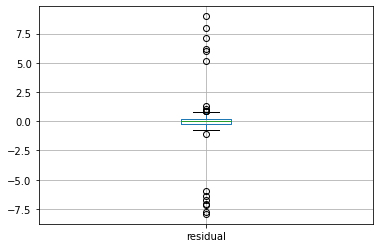

In [642]:
# Boxplot for residuals
outlier_BK.boxplot(column='residual')

In [643]:
outlier_BK.residual.describe()

count    341.000000
mean      -0.039085
std        1.410899
min       -7.929899
25%       -0.248336
50%       -0.008070
75%        0.184231
max        8.983584
Name: residual, dtype: float64

In [644]:
# Create lower and upper bounds
lower_boundBK = outlier_BK.residual.quantile(0.25) - 1.5*(outlier_BK.residual.quantile(0.75) - outlier_BK.residual.quantile(0.25))

In [645]:
upper_boundBK = outlier_BK.residual.quantile(0.75) + 1.5*(outlier_BK.residual.quantile(0.75) - outlier_BK.residual.quantile(0.25))

In [646]:
# Remove outliers
outlier_BK = outlier_BK[outlier_BK['residual'] < upper_boundBK]
outlier_BK = outlier_BK[outlier_BK['residual'] > lower_boundBK]

print(outlier_BK.shape)

(321, 18)


Re-run the model 

In [647]:
# Y: delivery fee is target variable
y = outlier_BK['undiscounted_delivery_fee']

# X: 3 independent variables
x = outlier_BK[['time_of_day', 'distance_to_customer_KM', 'weekend']]

# Encode categorical data
x = pd.get_dummies(x)
x

,time_of_day,distance_to_customer_KM,weekend
2,2,7.277,0
6,1,7.914,1
9,0,10.644,1
11,1,4.946,1
12,1,7.215,0
...,...,...,...
990,1,7.563,1
992,0,6.481,0
993,2,10.384,1
994,0,9.014,0


In [648]:
# delivery fee and the other variables
linear_reg = linear_regression_model(x, y)
predict_variables = outlier_BK[['time_of_day', 'distance_to_customer_KM', 'weekend']]
# predict new calculated delivery fee
predict_delivery_fee = linear_prediction_model(linear_reg, predict_variables)
# add the new column to the dataframe
outlier_BK['undiscounted_delivery_fee'] = predict_delivery_fee

Training R2 0.9869100136293225
Testing R2 0.9853046102760916


Now, look at the final branch

#### 3.4.3 NS Branch

In [649]:
# Get residuals based on the difference between true and predicted values
outlier_NS['residual'] = outlier_NS.apply(lambda x: (x['undiscounted_delivery_fee']-x['predicted_delivery_fee']), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


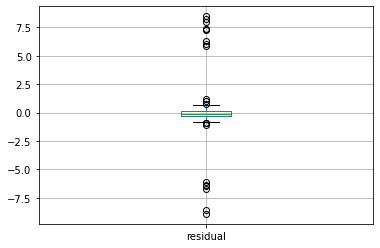

In [650]:
# Boxplot of the residuals
outlier_NS.boxplot(column='residual')

In [651]:
outlier_NS.residual.describe()

count    318.000000
mean      -0.032428
std        1.615669
min       -8.906697
25%       -0.296315
50%       -0.117966
75%        0.117542
max        8.473613
Name: residual, dtype: float64

In [652]:
# Create the upper and lower bounds
lower_boundNS = outlier_NS.residual.quantile(0.25) - 1.5*(outlier_NS.residual.quantile(0.75) - outlier_NS.residual.quantile(0.25))
upper_boundNS = outlier_NS.residual.quantile(0.75) + 1.5*(outlier_NS.residual.quantile(0.75) - outlier_NS.residual.quantile(0.25))

In [653]:
# Remove outliers
outlier_NS = outlier_NS[outlier_NS['residual'] < upper_boundNS]
outlier_NS = outlier_NS[outlier_NS['residual'] > lower_boundNS]

print(outlier_NS.shape)

(296, 18)


Re-train the model

In [654]:
# Y: delivery fee is target variable
y = outlier_NS['undiscounted_delivery_fee']

# X: 3 independent variables
x = outlier_NS[['time_of_day', 'distance_to_customer_KM', 'weekend']]

# Encode categorical data
x = pd.get_dummies(x)
x

,time_of_day,distance_to_customer_KM,weekend
0,0,10.020,0
3,1,7.642,1
4,2,9.429,0
7,1,10.067,0
10,2,8.008,0
...,...,...,...
982,1,10.124,0
983,0,9.378,0
985,2,8.694,0
997,1,9.491,0


In [655]:
# delivery fee and the other variables
linear_reg = linear_regression_model(x, y)
predict_variables = outlier_NS[['time_of_day', 'distance_to_customer_KM', 'weekend']]
# predict new calculated delivery fee
predict_delivery_fee = linear_prediction_model(linear_reg, predict_variables)
# add the column to the dataframe
outlier_NS['undiscounted_delivery_fee'] = predict_delivery_fee

Training R2 0.9736323488104133
Testing R2 0.9684875662321822


Now each of the branch models perform significantly better with the outliers removed as opposed to having them in each dataset.

### 3.5 Combine Data and remove the Missing Dataset

In [656]:
# Combine the 3 branches
outlier_final = pd.concat([outlier_TP, outlier_BK, outlier_NS], axis=0)

In [657]:
outlier_final.shape

(939, 18)

We can see that there have been 53 rows removed from our combined dataset

In [658]:
# Reindex rows
outlier_final = outlier_final.sort_index(axis=0,ascending=True)

Only keep the outlier dataset and remove the missing dataset

In [659]:
outlier_final = outlier_final[:452]

And we can see that 48 rows have been dropped for the outlier dataset specifically

In [660]:
# Drop the unnecessary columns
outlier_final = outlier_final.drop(['day_of_week', 'weekend', 'undiscounted_delivery_fee', 'predicted_delivery_fee', 'time_of_day', 'residual'], axis=1)

In [661]:
outlier_final.shape

(452, 12)

### 3.6 Save Output File

In [662]:
# use to_csv() method
outlier_final.to_csv("28746511_outlier_data_solution.csv", index = False)